# Deloitte - NYC Department of Health and Mental Hygiene
- Author: Jenny Choi
- Modify date: 04/18/2022

# < Data Cleaning >

In [1]:
# importing necessary packages
import os
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
# reading in file
inspection= pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
inspection


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41671751,GULSHAN TERRACE,Queens,5915,37 AVENUE,11377.0,7184574577,Bangladeshi,1/11/2018,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.749876,-73.903224,402.0,26.0,25900.0,4027374.0,4.011980e+09,QN63
1,41238209,TOWER'S CAFE,Manhattan,506,LENOX AVENUE,10037.0,2129394521,American,1/14/2019,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.814351,-73.940658,110.0,9.0,21200.0,1053899.0,1.017330e+09,MN03
2,41218954,MARIACHI TACO,Brooklyn,3428,FULTON STREET,11208.0,7182358880,Tex-Mex,4/3/2018,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.684500,-73.869152,305.0,37.0,118400.0,3092961.0,3.041500e+09,BK83
3,41218954,MARIACHI TACO,Brooklyn,3428,FULTON STREET,11208.0,7182358880,Tex-Mex,4/3/2018,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.684500,-73.869152,305.0,37.0,118400.0,3092961.0,3.041500e+09,BK83
4,50033448,C. LO CAFE,Brooklyn,39,BUSHWICK AVENUE,11211.0,3479873402,American,7/3/2017,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.713580,-73.941495,301.0,34.0,48100.0,3070395.0,3.029190e+09,BK90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374603,40984211,LONG ISLAND UNIVERSITY - SHARK BITE,Brooklyn,1,UNIVERSITY PLAZA,11201.0,7182466466,American,3/11/2020,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.691743,-73.981544,302.0,35.0,3100.0,3338885.0,3.020850e+09,BK68
374604,41588029,PIERRE LOTI MIDTOWN,Manhattan,30012,EAST 52 STREET,NaN,2127555684,Mediterranean,1/22/2020,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
374605,50014027,XIAO WEI MALA YABU,Queens,13655,ROOSEVELT AVE,11354.0,6466238886,Chinese,12/7/2017,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.760024,-73.828314,407.0,20.0,87100.0,4112510.0,4.049800e+09,QN22
374606,40945916,CALIBELLA BAKERY,Brooklyn,164,WYCKOFF AVENUE,11237.0,7184973614,Bakery Products/Desserts,12/6/2021,Violations were cited in the following area(s).,...,1/29/2022,Cycle Inspection / Initial Inspection,40.702382,-73.916165,304.0,37.0,44300.0,3075160.0,3.032900e+09,BK77


In [3]:
# snapshot of the data with examples
# https://www.kaggle.com/code/nextbigwhat/train-valid-test-split-instead-of-train-test-split/notebook

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)


from fast_ml.utilities import display_all
from fast_ml import eda

inspection_summary = eda.df_info(inspection)
display_all(inspection_summary)


,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
CAMIS,int64,Numerical,29922,"[41671751, 41238209, 41218954, 50033448, 41583...",0,0.0
DBA,object,Categorical,23092,"[GULSHAN TERRACE, TOWER'S CAFE, MARIACHI TACO,...",1104,0.294708
BORO,object,Categorical,6,"[Queens, Manhattan, Brooklyn, Bronx, Staten Is...",0,0.0
BUILDING,object,Categorical,7658,"[5915, 506, 3428, 39, 1212, 111, 13207, 9529, ...",617,0.164706
STREET,object,Categorical,2487,"[37 AVENUE, LENOX AVENUE, FULTON STREET, BUSHW...",12,0.003203
ZIPCODE,float64,Numerical,229,"[11377.0, 10037.0, 11208.0, 11211.0, 11226.0, ...",5532,1.476744
PHONE,object,Categorical,27361,"[7184574577, 2129394521, 7182358880, 347987340...",27,0.007208
CUISINE DESCRIPTION,object,Categorical,87,"[Bangladeshi, American, Tex-Mex, Latin America...",3728,0.995174
INSPECTION DATE,object,Categorical,1563,"[1/11/2018, 1/14/2019, 4/3/2018, 7/3/2017, 2/2...",0,0.0
ACTION,object,Categorical,5,[Violations were cited in the following area(s...,3727,0.994907


In [4]:
# Data Cleaning: satats numeric columns
inspection.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,3.746080e+05,369076.000000,357726.000000,374245.000000,374245.000000,368178.000000,368186.000000,368186.000000,3.664450e+05,3.736980e+05
mean,4.657333e+07,10682.785684,20.502150,40.128895,-72.851420,248.858435,19.999261,28944.326387,2.514042e+06,2.403995e+09
std,4.326340e+06,601.940813,15.029644,4.910400,8.913980,130.226966,15.685675,30545.320048,1.346629e+06,1.339717e+09
min,3.007544e+07,10000.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.146714e+07,10022.000000,11.000000,40.686617,-73.988751,105.000000,4.000000,8000.000000,1.044743e+06,1.010498e+09
50%,5.001610e+07,10469.000000,15.000000,40.733151,-73.957035,301.000000,20.000000,16600.000000,3.008365e+06,3.001830e+09
75%,5.006671e+07,11229.000000,26.000000,40.762211,-73.897295,401.000000,34.000000,40500.000000,4.002418e+06,4.001680e+09
max,5.011884e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [5]:
# change datatypes for columns with date and zip
inspection['INSPECTION DATE'] = pd.to_datetime(inspection['INSPECTION DATE'])
inspection['GRADE DATE'] = pd.to_datetime(inspection['GRADE DATE'])
inspection['RECORD DATE'] = pd.to_datetime(inspection['RECORD DATE'])

inspection['ZIPCODE'] = inspection['ZIPCODE'].astype('Int64')
inspection['Community Board'] = inspection['Community Board'].astype('Int64')
inspection['Council District'] = inspection['Council District'].astype('Int64')
inspection['Census Tract'] = inspection['Census Tract'].astype('Int64')
inspection['BIN'] = inspection['BIN'].astype('Int64')
inspection['BBL'] = inspection['BBL'].astype('Int64')

inspection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374608 entries, 0 to 374607
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CAMIS                  374608 non-null  int64         
 1   DBA                    373504 non-null  object        
 2   BORO                   374608 non-null  object        
 3   BUILDING               373991 non-null  object        
 4   STREET                 374596 non-null  object        
 5   ZIPCODE                369076 non-null  Int64         
 6   PHONE                  374581 non-null  object        
 7   CUISINE DESCRIPTION    370880 non-null  object        
 8   INSPECTION DATE        374608 non-null  datetime64[ns]
 9   ACTION                 370881 non-null  object        
 10  VIOLATION CODE         366415 non-null  object        
 11  VIOLATION DESCRIPTION  368776 non-null  object        
 12  CRITICAL FLAG          374608 non-null  obje

In [6]:
# check areas where date looks odd
inspection.groupby([inspection['INSPECTION DATE'].dt.year]).agg({'count'})

# it appears that the data prior to 2015 may not be accurate

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
INSPECTION DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
1900,3727,2679,3727,3701,3715,3658,3724,0,3727,0,0,0,3727,0,0,0,3727,0,3687,3687,3626,3626,3626,3565,3683,3626
2009,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0
2013,3,3,3,3,3,3,3,3,3,3,2,2,3,3,1,1,3,3,3,3,3,3,3,3,3,3
2014,18,18,18,18,18,18,18,18,18,18,18,18,18,16,12,12,18,18,18,18,18,18,18,18,18,18
2015,111,111,111,111,111,107,111,111,111,111,110,110,111,98,55,55,111,111,111,111,107,107,107,107,111,107
2016,10494,10494,10494,10451,10494,10220,10483,10494,10494,10494,10315,10401,10494,9993,5342,5342,10494,10494,10478,10478,10165,10165,10165,10127,10439,10165
2017,55738,55728,55738,55585,55738,54764,55731,55738,55738,55738,55006,55414,55738,53610,27896,27896,55738,55738,55664,55664,54560,54565,54565,54331,55534,54560
2018,95521,95505,95521,95341,95521,94017,95518,95521,95521,95521,93998,94788,95521,91497,48804,48769,95521,95521,95430,95430,93802,93802,93802,93401,95306,93802


In [7]:
# Remove data records where inspection dates are prior to 2019
inspection = inspection[~(inspection['INSPECTION DATE'] < '2018-01-01')]

#check data
inspection.groupby([inspection['INSPECTION DATE'].dt.year]).agg({'count'})


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
INSPECTION DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,95521,95505,95521,95341,95521,94017,95518,95521,95521,95521,93998,94788,95521,91497,48804,48769,95521,95521,95430,95430,93802,93802,93802,93401,95306,93802
2019,143118,143093,143118,142952,143118,141119,143115,143118,143118,143118,141576,142375,143118,138691,73232,72864,143118,143118,143018,143018,140825,140826,140826,140129,142824,140825
2020,31003,30998,31003,30962,31003,30665,31003,31003,31003,31003,30716,30911,31003,29902,16341,15505,31003,31003,30975,30975,30614,30616,30616,30493,30952,30614
2021,27519,27519,27519,27516,27519,27231,27519,27519,27519,27519,27334,27415,27519,26729,12778,10026,27519,27519,27511,27511,27204,27204,27204,27061,27492,27204
2022,7355,7355,7355,7350,7355,7273,7355,7355,7355,7355,7339,7341,7355,7186,4508,3881,7355,7355,7350,7350,7254,7254,7254,7210,7336,7254


In [8]:
# check duplicates throughout dataset
duplicate = inspection[inspection.duplicated()]

duplicate.count()

CAMIS                    18419
DBA                      18417
BORO                     18419
BUILDING                 18400
STREET                   18419
ZIPCODE                  18184
PHONE                    18419
CUISINE DESCRIPTION      18419
INSPECTION DATE          18419
ACTION                   18419
VIOLATION CODE           18373
VIOLATION DESCRIPTION    18419
CRITICAL FLAG            18419
SCORE                    18177
GRADE                    11487
GRADE DATE               11252
RECORD DATE              18419
INSPECTION TYPE          18419
Latitude                 18411
Longitude                18411
Community Board          18152
Council District         18152
Census Tract             18152
BIN                      18065
BBL                      18387
NTA                      18152
dtype: int64

In [9]:
# remove duplicates
inspection = inspection.drop_duplicates()

# check data should have removed approximately 22k from the original 370k 
inspection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286097 entries, 0 to 374606
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CAMIS                  286097 non-null  int64         
 1   DBA                    286053 non-null  object        
 2   BORO                   286097 non-null  object        
 3   BUILDING               285721 non-null  object        
 4   STREET                 286097 non-null  object        
 5   ZIPCODE                282121 non-null  Int64         
 6   PHONE                  286091 non-null  object        
 7   CUISINE DESCRIPTION    286097 non-null  object        
 8   INSPECTION DATE        286097 non-null  datetime64[ns]
 9   ACTION                 286097 non-null  object        
 10  VIOLATION CODE         282590 non-null  object        
 11  VIOLATION DESCRIPTION  284411 non-null  object        
 12  CRITICAL FLAG          286097 non-null  obje

In [10]:
# checking data after dropping duplicates
# unique inspection violations recorded by year in the inspection results dataset
inspection.groupby([inspection['INSPECTION DATE'].dt.year]).agg({'count'})


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
INSPECTION DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,89863,89847,89863,89694,89863,88459,89860,89863,89863,89863,88359,89130,89863,85923,45291,45259,89863,89863,89777,89777,88257,88257,88257,87878,89661,88257
2019,134439,134416,134439,134278,134439,132544,134436,134439,134439,134439,132914,133696,134439,130091,67765,67420,134439,134439,134342,134342,132261,132262,132262,131608,134156,132261
2020,28973,28968,28973,28935,28973,28649,28973,28973,28973,28973,28693,28881,28973,27890,15012,14218,28973,28973,28945,28945,28602,28604,28604,28494,28926,28602
2021,25900,25900,25900,25897,25900,25625,25900,25900,25900,25900,25718,25796,25900,25164,11901,9293,25900,25900,25892,25892,25600,25600,25600,25462,25875,25600
2022,6922,6922,6922,6917,6922,6844,6922,6922,6922,6922,6906,6908,6922,6760,4207,3603,6922,6922,6917,6917,6827,6827,6827,6787,6905,6827


In [11]:
#export cleaned data as CSV to relative location for visualizations
inspection.to_csv('cleaned_inspection.csv')


In [12]:
# through our initial data exploration, we saw a drastic reduction in the number of inspections in 2020 and 2021.
# hence we will be focusing on the data for 2020 and 2021 moving forwward

# create a subset that only includes inspection results from 2020 and beyond
#PC stands for "Post-COVID" in this case


PC_inspection = inspection[~(inspection['INSPECTION DATE'] < '2018-01-01')]
PC_inspection = PC_inspection[~(PC_inspection['INSPECTION DATE'] > '2021-12-31')]


In [13]:
# only some violations are taken into consideration for scoring. 
# in other words, they don't post a risk and we can remove from dataset

PC_inspection=PC_inspection.dropna(subset=['SCORE'])

#PC_inspection = PC_inspection[~(PC_inspection['CRITICAL FLAG'] != 'Critical')]

#get the % of data we will actually be examining
PC_inspection.shape[0]/inspection.shape[0]


0.940478229411703

In [14]:
PC_inspection.shape[0]

269068

In [15]:
#check data; should only see counts from 2018 to 2021
PC_inspection.groupby([PC_inspection['INSPECTION DATE'].dt.year]).agg({'count'})

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
INSPECTION DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,85923,85909,85923,85757,85923,84584,85920,85923,85923,85923,85277,85651,85923,85923,45291,45259,85923,85923,85838,85838,84385,84385,84385,84034,85724,84385
2019,130091,130068,130091,129933,130091,128253,130088,130091,130091,130091,129240,129653,130091,130091,67765,67420,130091,130091,129995,129995,127976,127977,127977,127339,129814,127976
2020,27890,27885,27890,27854,27890,27582,27890,27890,27890,27890,27766,27862,27890,27890,15012,14218,27890,27890,27864,27864,27537,27539,27539,27432,27845,27537
2021,25164,25164,25164,25161,25164,24902,25164,25164,25164,25164,25012,25062,25164,25164,11894,9293,25164,25164,25156,25156,24877,24877,24877,24740,25139,24877


In [16]:
# count the nulls 
count_nan_in_PC_inspection = PC_inspection.isnull().sum()
print (count_nan_in_PC_inspection)


CAMIS                         0
DBA                          42
BORO                          0
BUILDING                    363
STREET                        0
ZIPCODE                    3747
PHONE                         6
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE             1773
VIOLATION DESCRIPTION       840
CRITICAL FLAG                 0
SCORE                         0
GRADE                    129106
GRADE DATE               132878
RECORD DATE                   0
INSPECTION TYPE               0
Latitude                    215
Longitude                   215
Community Board            4293
Council District           4290
Census Tract               4290
BIN                        5523
BBL                         546
NTA                        4293
dtype: int64


In [17]:
# fill zip with 0
PC_inspection['ZIPCODE'] = PC_inspection['ZIPCODE'].fillna(0)

# can be chaged depends on Kyle's progress

In [18]:
# recount null values
count_nan_in_PC_inspection = PC_inspection.isnull().sum()
print (count_nan_in_PC_inspection)


CAMIS                         0
DBA                          42
BORO                          0
BUILDING                    363
STREET                        0
ZIPCODE                       0
PHONE                         6
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE             1773
VIOLATION DESCRIPTION       840
CRITICAL FLAG                 0
SCORE                         0
GRADE                    129106
GRADE DATE               132878
RECORD DATE                   0
INSPECTION TYPE               0
Latitude                    215
Longitude                   215
Community Board            4293
Council District           4290
Census Tract               4290
BIN                        5523
BBL                         546
NTA                        4293
dtype: int64


In [19]:
# create a column to get inspection year
PC_inspection['INSPECTION YEAR'] = pd.DatetimeIndex(PC_inspection['INSPECTION DATE']).year
PC_inspection.head().sort_values(by='CAMIS', ascending=False)
PC_inspection


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR
0,41671751,GULSHAN TERRACE,Queens,5915,37 AVENUE,11377,7184574577,Bangladeshi,2018-01-11,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2018-01-11,2022-01-29,Cycle Inspection / Initial Inspection,40.749876,-73.903224,402,26,25900,4027374,4011980001,QN63,2018
1,41238209,TOWER'S CAFE,Manhattan,506,LENOX AVENUE,10037,2129394521,American,2019-01-14,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,11.0,A,2019-01-14,2022-01-29,Cycle Inspection / Initial Inspection,40.814351,-73.940658,110,9,21200,1053899,1017330001,MN03,2019
2,41218954,MARIACHI TACO,Brooklyn,3428,FULTON STREET,11208,7182358880,Tex-Mex,2018-04-03,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,2018-04-03,2022-01-29,Cycle Inspection / Initial Inspection,40.684500,-73.869152,305,37,118400,3092961,3041500026,BK83,2018
5,41583191,QUEZADA RESTAURANT,Brooklyn,1212,FLATBUSH AVENUE,11226,7182820622,Latin American,2019-02-20,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,41.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.640853,-73.956001,314,40,51602,3119587,3051860031,BK42,2019
7,40983698,YUCA BAR & RESTAURANT,Manhattan,111,AVENUE A,10009,2129829533,Latin American,2021-07-20,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,22.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.726143,-73.983476,103,2,3200,1077644,1004350037,MN22,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374601,41643117,JEAN CLAUDE FRENCH BISTRO,Manhattan,1343,2 AVENUE,10021,2122493400,French,2020-02-05,Violations were cited in the following area(s).,10J,Hand wash sign not posted,Not Critical,11.0,A,2020-02-05,2022-01-29,Cycle Inspection / Re-inspection,40.767926,-73.959010,108,4,12600,1043926,1014250026,MN31,2020
374602,50048394,SUPER POWER,Brooklyn,722,NOSTRAND AVENUE,11216,7184840020,American,2018-02-08,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,40.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.673914,-73.950128,308,36,31701,3031212,3012330047,BK61,2018
374603,40984211,LONG ISLAND UNIVERSITY - SHARK BITE,Brooklyn,1,UNIVERSITY PLAZA,11201,7182466466,American,2020-03-11,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,27.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.691743,-73.981544,302,35,3100,3338885,3020850001,BK68,2020
374604,41588029,PIERRE LOTI MIDTOWN,Manhattan,30012,EAST 52 STREET,0,2127555684,Mediterranean,2020-01-22,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2020-01-22,2022-01-29,Cycle Inspection / Initial Inspection,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,1,NaN,2020


In [20]:
# getting the number of restaurants in the dataset
PC_inspection['CAMIS'].value_counts()

# there are inspection results from 25941 restaurants

41187577    71
40400811    70
50069376    67
50064654    63
41697391    62
            ..
50092889     1
40554018     1
50099221     1
50043327     1
50087766     1
Name: CAMIS, Length: 25941, dtype: int64

# < Getting Risk Factors >

## Risk Factor 1: Latest inspection score

In [21]:
# only display the latest inspection score

Latest_Score=PC_inspection.loc[PC_inspection.groupby('CAMIS')['INSPECTION DATE'].idxmax()]
df_Latest_Score = pd.DataFrame(Latest_Score)
df_Latest_Score = df_Latest_Score.rename(columns={"SCORE": "LATEST SCORE"})
df_Latest_Score = df_Latest_Score[['CAMIS','LATEST SCORE']].copy()

df_Latest_Score.head(50)
df_Latest_Score.sort_values(by='LATEST SCORE', ascending=True)


,CAMIS,LATEST SCORE
190303,50071506,0.0
133673,50094696,0.0
285133,50044610,0.0
328483,40756088,0.0
147602,50044611,0.0
...,...,...
89468,41060762,103.0
65169,50072690,107.0
3006,50112862,107.0
12669,50095591,121.0


In [22]:
# adding the column 'LATEST SCORE' to 'PC_inspection'
# extracting data by the inspection date per restaurant
PC_inspection_factor_1_latest_score = pd.merge(PC_inspection, df_Latest_Score, on="CAMIS").sort_values(["CAMIS", "INSPECTION DATE"], ascending=(True, True))
PC_inspection_factor_1_latest_score


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE
230537,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230539,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230541,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230535,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230542,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142967,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0
142968,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0
142969,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0
142970,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,05E,Insufficient or no refrigerated or hot holding...,Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0


In [23]:
# getting the number of restaurants in the dataset
PC_inspection_factor_1_latest_score['CAMIS'].value_counts()

# there are inspection results from 25941 restaurants

41187577    71
40400811    70
50069376    67
50064654    63
41697391    62
            ..
50106617     1
50100685     1
50102033     1
50099460     1
50088879     1
Name: CAMIS, Length: 25941, dtype: int64

In [24]:
# exploring the lastest inspection scores
PC_inspection_factor_1_latest_score.describe()

# approximately more than 50% of the restaurants are in the range of Grade A (latest socore from 0 to 14)
# more than 25% will be potentially subject to re-inspect


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE
count,2.690680e+05,269068.000000,269068.000000,268853.000000,268853.000000,264775.000000,264778.000000,264778.000000,2.635450e+05,2.685220e+05,269068.000000,269068.000000
mean,4.668138e+07,10542.369427,20.985271,40.162073,-72.910240,250.452244,20.081268,29297.739763,2.530689e+06,2.422107e+09,2018.971364,14.680014
std,4.305164e+06,1387.713082,15.310410,4.775205,8.668365,130.100661,15.614079,30787.197340,1.345863e+06,1.337989e+09,0.892336,10.442778
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000
25%,4.148330e+07,10022.000000,11.000000,40.686764,-73.988609,106.000000,4.000000,8000.000000,1.045936e+06,1.010580e+09,2018.000000,9.000000
50%,5.001875e+07,10469.000000,16.000000,40.733158,-73.956030,301.000000,20.000000,16900.000000,3.011855e+06,3.002945e+09,2019.000000,12.000000
75%,5.007086e+07,11230.000000,27.000000,40.762169,-73.895781,401.000000,34.000000,40900.000000,4.005224e+06,4.004050e+09,2019.000000,17.000000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000


In [25]:
# extracting data by the inspection date per restaurant
PC_inspection_factor_1_latest_score_per_date = PC_inspection_factor_1_latest_score.loc[PC_inspection_factor_1_latest_score.groupby('CAMIS')['INSPECTION DATE'].idxmax()]
PC_inspection_factor_1_latest_score_per_date
#PC_inspection_factor_1_per_date.head(30)



,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE
230540,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2021-08-10,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,5.0,A,2021-08-10,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2021,5.0
245145,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2021-08-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20.0,Z,2021-08-05,2022-01-29,Cycle Inspection / Re-inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2021,20.0
224329,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0
243610,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2019-11-08,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2019-11-08,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2019,10.0
244877,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2021-07-30,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2021,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251231,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,30.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.758849,-73.830119,407,20,87100,4449971,4050370152,QN22,2021,30.0
258288,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,14.0,N,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.705180,-73.906199,405,34,54900,4082941,4034680039,QN20,2021,14.0
40393,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.755582,-73.885150,403,25,32700,4034495,4014120043,QN28,2021,21.0
192340,50117547,ORIGINAL JOE'S PIZZA,Bronx,2136,WILLIAMSBRIDGE ROAD,10461,9149075052,Pizza,2021-12-13,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2021-12-13,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.856045,-73.855644,211,13,28800,2049259,2043100052,BX49,2021,13.0


In [26]:
# getting the number of restaurants in the dataset
PC_inspection_factor_1_latest_score_per_date['CAMIS'].value_counts()

# there are inspection results from 25941 restaurants

30075445    1
50071835    1
50071893    1
50071889    1
50071879    1
           ..
41704296    1
41704282    1
41704249    1
41704189    1
50117597    1
Name: CAMIS, Length: 25941, dtype: int64

In [27]:
# exploring the lastest inspection scores
PC_inspection_factor_1_latest_score_per_date.describe()

# 75% of the restaurants are in the range of Grade A (latest socore from 0 to 14)
# less than 25% will be potentially subject to re-inspect

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE
count,2.594100e+04,25941.000000,25941.000000,25900.000000,25900.000000,25430.000000,25431.000000,25431.000000,2.529200e+04,2.583800e+04,25941.000000,25941.000000
mean,4.699045e+07,10511.465017,12.563201,40.086879,-72.778609,249.099843,20.049428,28978.271794,2.517477e+06,2.400231e+09,2019.788135,12.563201
std,4.228799e+06,1459.301368,9.155913,5.071974,9.207775,131.265201,15.799243,30748.230689,1.354439e+06,1.349017e+09,0.826265,9.155913
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000
25%,4.154023e+07,10021.000000,8.000000,40.685743,-73.989027,105.000000,4.000000,8000.000000,1.044840e+06,1.010360e+09,2019.000000,8.000000
50%,5.004366e+07,10467.000000,11.000000,40.732542,-73.958545,301.000000,20.000000,16100.000000,3.007304e+06,3.001520e+09,2020.000000,11.000000
75%,5.008309e+07,11228.000000,13.000000,40.761858,-73.898950,401.000000,34.000000,40502.000000,4.001512e+06,4.001620e+09,2021.000000,13.000000
max,5.011760e+07,30339.000000,133.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000


In [28]:
latest_score_value_count = PC_inspection_factor_1_latest_score_per_date['LATEST SCORE'].value_counts()
latest_score_value_count.head(30)

# the most popular latest inspection score is 12

12.0    3949
13.0    2877
10.0    2532
9.0     2192
7.0     1965
11.0    1854
2.0     1230
5.0     1205
8.0      921
4.0      666
3.0      539
6.0      358
19.0     351
21.0     350
0.0      318
20.0     301
16.0     300
22.0     280
18.0     280
17.0     265
25.0     264
23.0     257
26.0     247
24.0     228
14.0     223
27.0     221
15.0     151
30.0     142
28.0     124
29.0     102
Name: LATEST SCORE, dtype: int64

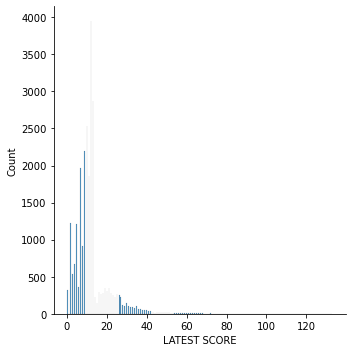

In [29]:
# visuallization - distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(PC_inspection_factor_1_latest_score_per_date, x="LATEST SCORE")


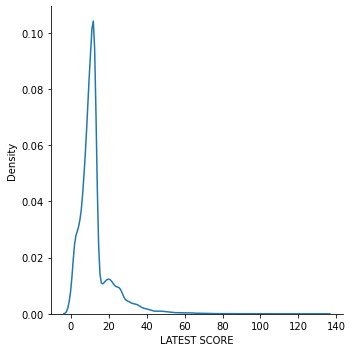

In [30]:
sns.displot(PC_inspection_factor_1_latest_score_per_date, x="LATEST SCORE", kind="kde")


#### Findings about LATEST SCORE
- 0:   Grade A (Latest Inspection Score 1-13)
- 1:   Grade B (Latest Inspection Score 14-27)
- 2:   Grade C (Latest Inspection Score 28-50)
- 3:   Grade D (Latest Inspection Score above 50)


In [31]:
# checking raw data to see details of all rows of data
# reading in file
inspection_raw= pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
inspection_raw.head()

inspection_raw = inspection_raw.sort_values(by='CAMIS')
inspection_raw


# extracting certain data by filtering
# extracting all rows of data of the D rage (Severely high scores) of the inspection result scores 
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/
score_D = inspection_raw[(inspection_raw['SCORE'] > 50)].sort_values(by='CAMIS')
score_D


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
254180,40364179,SPOONBREAD TOO,Manhattan,364,WEST 110 STREET,10025.0,2128656744,Soul Food,5/23/2018,Establishment Closed by DOHMH. Violations were...,05F,Insufficient or no refrigerated or hot holding...,Critical,59.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.801371,-73.960160,107.0,7.0,19300.0,1055741.0,1.018450e+09,MN09
300123,40364179,SPOONBREAD TOO,Manhattan,364,WEST 110 STREET,10025.0,2128656744,Soul Food,5/23/2018,Establishment Closed by DOHMH. Violations were...,02B,Hot food item not held at or above 140º F.,Critical,59.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.801371,-73.960160,107.0,7.0,19300.0,1055741.0,1.018450e+09,MN09
202547,40364179,SPOONBREAD TOO,Manhattan,364,WEST 110 STREET,10025.0,2128656744,Soul Food,5/23/2018,Establishment Closed by DOHMH. Violations were...,02H,Food not cooled by an approved method whereby ...,Critical,59.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.801371,-73.960160,107.0,7.0,19300.0,1055741.0,1.018450e+09,MN09
269071,40364179,SPOONBREAD TOO,Manhattan,364,WEST 110 STREET,10025.0,2128656744,Soul Food,5/23/2018,Establishment Closed by DOHMH. Violations were...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,59.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.801371,-73.960160,107.0,7.0,19300.0,1055741.0,1.018450e+09,MN09
247981,40364179,SPOONBREAD TOO,Manhattan,364,WEST 110 STREET,10025.0,2128656744,Soul Food,5/23/2018,Establishment Closed by DOHMH. Violations were...,02G,Cold food item held above 41º F (smoked fish a...,Critical,59.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.801371,-73.960160,107.0,7.0,19300.0,1055741.0,1.018450e+09,MN09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25405,50118501,ANA PARTY SHOP,Manhattan,701,WEST 180 STREET,10033.0,6462500358,Bakery Products/Desserts,1/18/2022,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,68.0,N,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection,40.849613,-73.936734,112.0,10.0,26500.0,1064282.0,1.021760e+09,MN36
63804,50118501,ANA PARTY SHOP,Manhattan,701,WEST 180 STREET,10033.0,6462500358,Bakery Products/Desserts,1/18/2022,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,68.0,N,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection,40.849613,-73.936734,112.0,10.0,26500.0,1064282.0,1.021760e+09,MN36
13222,50118501,ANA PARTY SHOP,Manhattan,701,WEST 180 STREET,10033.0,6462500358,Bakery Products/Desserts,1/18/2022,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,68.0,N,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection,40.849613,-73.936734,112.0,10.0,26500.0,1064282.0,1.021760e+09,MN36
256141,50118501,ANA PARTY SHOP,Manhattan,701,WEST 180 STREET,10033.0,6462500358,Bakery Products/Desserts,1/18/2022,Violations were cited in the following area(s).,05H,"No facilities available to wash, rinse and san...",Critical,68.0,N,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection,40.849613,-73.936734,112.0,10.0,26500.0,1064282.0,1.021760e+09,MN36


In [32]:
# checking the list of columns
score_D.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17824 entries, 254180 to 134515
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  17824 non-null  int64  
 1   DBA                    17824 non-null  object 
 2   BORO                   17824 non-null  object 
 3   BUILDING               17818 non-null  object 
 4   STREET                 17824 non-null  object 
 5   ZIPCODE                17629 non-null  float64
 6   PHONE                  17824 non-null  object 
 7   CUISINE DESCRIPTION    17824 non-null  object 
 8   INSPECTION DATE        17824 non-null  object 
 9   ACTION                 17824 non-null  object 
 10  VIOLATION CODE         17824 non-null  object 
 11  VIOLATION DESCRIPTION  17824 non-null  object 
 12  CRITICAL FLAG          17824 non-null  object 
 13  SCORE                  17824 non-null  float64
 14  GRADE                  1977 non-null   object 
 

In [33]:
# counting the most frequent 'VIOLATION CODE' in Grade D

score_D_violation_code_count = score_D['VIOLATION CODE'].value_counts()
print(score_D_violation_code_count,'\n\n')
print(score_D_violation_code_count.describe(),'\n\n')

score_D_violation_code_count.head(50)

08A    1944
06C    1450
02G    1374
10F    1230
04L    1174
       ... 
02J       1
02D       1
02E       1
04B       1
04G       1
Name: VIOLATION CODE, Length: 61, dtype: int64 


count      61.000000
mean      292.196721
std       431.242655
min         1.000000
25%        17.000000
50%       100.000000
75%       332.000000
max      1944.000000
Name: VIOLATION CODE, dtype: float64 




08A    1944
06C    1450
02G    1374
10F    1230
04L    1174
02B    1001
04N     979
10B     838
06D     771
04H     628
05D     598
04M     589
04A     562
06A     352
02H     351
05H     332
05F     319
10H     305
08C     294
06E     263
06F     223
05C     215
04J     200
04K     193
09B     170
09C     144
10I     122
06B     119
04C     114
05E     101
05A     100
10E      92
03A      91
04F      82
10J      76
10D      53
02I      43
06G      38
10A      34
03B      26
09A      23
04O      21
04E      20
22G      20
02C      19
03E      17
05B      17
02A      17
04D      15
22F      12
Name: VIOLATION CODE, dtype: int64

In [34]:
# checking detials of the violation code file
violation_code_info = pd.read_excel('20220225 Fines_by_Violation_Codes.xlsx') 
violation_code_info

,Violation Code,Citation,Category,Violation Description,Violation Penalty Condition I*,Violation Penalty Condition II*,Violation Penalty Condition III*,Violation Penalty Condition IV*,Violation Penalty Condition V*,Unnamed: 9,Data source,https://codelibrary.amlegal.com/codes/newyorkcity/latest/NYCrules/0-0-0-43593
0,02A,NYCHC 81.09(c),Public Health Hazard,"Time and temperature control for safety (""TCS""...",NaN,NaN,NaN,400.0,600.0,NaN,NaN,NaN
1,02A,NYCHC 81.09(c)(1),Public Health Hazard,"Poultry, poultry stuffing, parts and ground, c...",NaN,NaN,NaN,400.0,600.0,NaN,NaN,NaN
2,02A,NYCHC 81.09(c)(2),Public Health Hazard,Pork/food containing pork not heated to 150°F ...,NaN,NaN,NaN,400.0,600.0,NaN,NaN,NaN
3,02A,NYCHC 81.09(c)(3),Public Health Hazard,Rare roast beef/steaks not heated to minimum t...,NaN,NaN,NaN,400.0,600.0,NaN,NaN,NaN
4,02A,NYCHC 81.09(c)(4),Public Health Hazard,"Ground, comminuted meat, foods containing grou...",NaN,NaN,NaN,400.0,600.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
134,10G,NYCHC 81.29(b)(2),GENERAL,Mechanical chemical sanitizing procedure inade...,200,200.0,200.0,200.0,NaN,NaN,NaN,NaN
135,10G,NYCHC 81.29(a)(3)(B),GENERAL,Test kit not accurate or used for manual dishw...,200,200.0,200.0,200.0,NaN,NaN,NaN,NaN
136,10G,NYCHC 81.29(b)(2),GENERAL,Test kit not accurate or used for mechanical d...,200,200.0,200.0,200.0,NaN,NaN,NaN,NaN
137,10H,NYCHC 81.07(o),GENERAL,Single service items improperly stored or reused,200,200.0,200.0,200.0,NaN,NaN,NaN,NaN


In [35]:
# identifying detailes of the top 10 vioation codes of score_D

# checking detials of the violation code file
# reading in data
violation_code_info = pd.read_excel('20220225 Fines_by_Violation_Codes.xlsx') 
violation_code_info

# extracting certain data by filtering
# identifying detailes of the top 10 vioation codes of score_D 
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/
#violation_code_top20_of_score_D = violation_code_info[(violation_code_info['Violation Code'] == '08A','06C','02G','10F','04L','02B','04N','10B','06D','04H')]
violation_code_top10_of_score_D = violation_code_info[(((violation_code_info['Violation Code'] == '08A') 
                                                        | (violation_code_info['Violation Code'] == '06C')
                                                        | (violation_code_info['Violation Code'] == '02G')
                                                        | (violation_code_info['Violation Code'] == '10F')
                                                        | (violation_code_info['Violation Code'] == '04L')
                                                        | (violation_code_info['Violation Code'] == '02B')
                                                        | (violation_code_info['Violation Code'] == '04N')
                                                        | (violation_code_info['Violation Code'] == '10B')
                                                        | (violation_code_info['Violation Code'] == '06D')
                                                        | (violation_code_info['Violation Code'] == '04H')))]
violation_code_top10_of_score_D

# Therefore, worst performed restaurants violated such codes.
# '08A','06C','02G','10F','04L','02B','04N','10B','06D','04H'

#[Top 1] 08A    1944 coutns 
#(Category: Critical) Harborage or conditions conducive to pests with pests, signs of pests
#(Category: General) Door openings into the establishment from the outside not properly equipped when pests or signs of pests present

#[Top 2] 06C    1450 coutns
#(Category: Critical) Food not protected from contamination
#(Category: Critical) Unnecessary traffic through food prep area
#(Category: Critical) Food not properly protected when stored
#(Category: Critical) Food not properly protected when displayed
#(Category: Critical) Condiments for self service not properly dispensed
#(Category: Critical) Supplies and equipment under or near source of contamination

#[Top 3] 02G    1374 coutns
#(Category: Public Health Hazard) Cold TCS food not held at 41°F or below
#(Category: Public Health Hazard) Processed or smoked fish not held at or below 38°F
#(Category: Public Health Hazard) Eggs not held at ambient temperature of 45°F or below
#(Category: Public Health Hazard) Reduced oxygen packaged raw TCS foods not held at proper temperatures
#(Category: Public Health Hazard) Reduced oxygen packaged TCS foods not held at proper temperatures

#[Top 4] 10F    1230 coutns
#(Category: General) Flooring: unacceptable material used, not maintained or not clean
#(Category: General) Non-food contact surfaces (wall, ceiling): unacceptable materials used: not maintained or not clean
#(Category: General) Non-food contact surface (equipment, fixtures, decorative material, fans, etc.) not clean or not in working order

#[Top 5] 04L    1174 coutns 
#(Category: Critical) Mice or evidence of mice

#[Top 6] 02B    1001 coutns
#(Category: Public Health Hazard) Hot TCS food not held at 140°F or above

#[Top 7] 04N     979 coutns
#(Category: Critical) Filth or FRSA flies, other nuisance pests

#[Top 8] 10B     838 coutns
#(Category: General) Potable water not protected from back-flow, back-siphonage or cross-connection
#(Category: General) Improper disposal of sewage or liquid waste

#[Top 9] 06D     771 coutns
#(Category: Critical) Food contact surface not washed, rinsed and sanitized when required

#[Top 10] 04H     628 coutns
#(Category: Public Health Hazard) Food not protected from cross-contamination
#(Category: Public Health Hazard) Food in contact with toxic material
#(Category: Public Health Hazard) Food not protected from adulteration or contamination
#(Category: Public Health Hazard) Food not discarded in accordance with HACCP plan


,Violation Code,Citation,Category,Violation Description,Violation Penalty Condition I*,Violation Penalty Condition II*,Violation Penalty Condition III*,Violation Penalty Condition IV*,Violation Penalty Condition V*,Unnamed: 9,Data source,https://codelibrary.amlegal.com/codes/newyorkcity/latest/NYCrules/0-0-0-43593
8,02B,NYCHC 81.09(a),Public Health Hazard,Hot TCS food not held at 140°F or above,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
13,02G,NYCHC 81.09(a),Public Health Hazard,Cold TCS food not held at 41°F or below,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
14,02G,NYCHC 81.09(a)(3),Public Health Hazard,Processed or smoked fish not held at or below ...,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
15,02G,NYCHC 81.09(a)(2),Public Health Hazard,Eggs not held at ambient temperature of 45°F o...,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
16,02G,NYCHC 81.12(d)(2),Public Health Hazard,Reduced oxygen packaged raw TCS foods not held...,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
17,02G,NYCHC 81.12(d)(4),Public Health Hazard,Reduced oxygen packaged TCS foods not held at ...,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
49,04H,NYCHC 81.07(a)(2),Public Health Hazard,Food not protected from cross-contamination,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
50,04H,NYCHC 81.07(a),Public Health Hazard,Food in contact with toxic material,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
51,04H,NYCHC 81.07(a),Public Health Hazard,Food not protected from adulteration or contam...,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN
52,04H,NYCHC 81.06(b)(3),Public Health Hazard,Food not discarded in accordance with HACCP plan,250,300.0,350.0,400.0,600.0,NaN,NaN,NaN


## Risk Factor 2-1: Average Score

In [36]:
# re-sorting by CAMIS (restaruant ID #) & inspection dates
PC_inspection_sorted = PC_inspection_factor_1_latest_score.sort_values(["CAMIS", "INSPECTION DATE"], ascending=(True, True))
PC_inspection_sorted

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE
230537,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230539,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230541,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230535,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230542,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142967,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0
142968,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0
142969,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0
142970,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,05E,Insufficient or no refrigerated or hot holding...,Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0


In [37]:
# getting the number of restaurants in the dataset
PC_inspection_sorted['CAMIS'].value_counts()

# there are inspection results from 25805 restaurants

41187577    71
40400811    70
50069376    67
50064654    63
41697391    62
            ..
50106617     1
50100685     1
50102033     1
50099460     1
50088879     1
Name: CAMIS, Length: 25941, dtype: int64

In [38]:
# getting one score record per inspection for calculating the avg. inspection score
# (Multiple socre records for the same inspection date per violation code)
one_score_record_per_inspection_date = PC_inspection_sorted.loc[PC_inspection_sorted.groupby(["CAMIS", "INSPECTION DATE"])["SCORE"].idxmax()] 
one_score_record_per_inspection_date.head(50)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE
230537,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230535,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230534,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-10-21,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,17.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230538,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-11-04,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,7.0,A,2019-11-04,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0
230540,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2021-08-10,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,5.0,A,2021-08-10,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2021,5.0
245146,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0
245147,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2021-07-20,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,10.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2021,20.0
245145,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2021-08-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20.0,Z,2021-08-05,2022-01-29,Cycle Inspection / Re-inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2021,20.0
224329,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0
243611,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0


In [39]:
# getting the sum of inspection score per restaurant for calculating the avg. inspection score
sum_of_inspection_score = one_score_record_per_inspection_date.groupby(by=["CAMIS"])["SCORE"].sum()
sum_of_inspection_score

# series to dataframe
df_sum_of_inspection_score = pd.DataFrame(sum_of_inspection_score)
df_sum_of_inspection_score

df_sum_of_inspection_score.columns =["SUM"]
df_sum_of_inspection_score

# changing "CAMIS" from index to column
df_sum_of_inspection_score.reset_index(inplace=True)
df_sum_of_inspection_score

#type(sum_of_inspection_score)

,CAMIS,SUM
0,30075445,49.0
1,30112340,43.0
2,30191841,8.0
3,40356018,20.0
4,40356483,27.0
...,...,...
25936,50117365,30.0
25937,50117424,14.0
25938,50117434,21.0
25939,50117547,13.0


In [40]:
# counting numbers of inspections (= different inspection dates) per resraurant for calculating the avg. inspection score 

count_of_inspection = PC_inspection_sorted.groupby("CAMIS")
count_of_inspection = count_of_inspection.agg({"INSPECTION DATE": "nunique"})
count_of_inspection = count_of_inspection.reset_index()
#count_of_inspection.head(50)
count_of_inspection

#count_of_inspection.info()

,CAMIS,INSPECTION DATE
0,30075445,5
1,30112340,3
2,30191841,1
3,40356018,2
4,40356483,2
...,...,...
25936,50117365,1
25937,50117424,1
25938,50117434,1
25939,50117547,1


In [41]:
# avg. inspection score
avg_inspection_score = pd.DataFrame(df_sum_of_inspection_score["SUM"]/count_of_inspection["INSPECTION DATE"])
avg_inspection_score

# adding "CAMIS"
avg_inspection_score["CAMIS"] = df_sum_of_inspection_score["CAMIS"]
avg_inspection_score

# renaming column names
avg_inspection_score.columns = ['AVG. SCORE', 'CAMIS']
avg_inspection_score

# changing column orders
avg_inspection_score = avg_inspection_score.reindex(columns=['CAMIS','AVG. SCORE'])
avg_inspection_score

,CAMIS,AVG. SCORE
0,30075445,9.800000
1,30112340,14.333333
2,30191841,8.000000
3,40356018,10.000000
4,40356483,13.500000
...,...,...
25936,50117365,30.000000
25937,50117424,14.000000
25938,50117434,21.000000
25939,50117547,13.000000


In [42]:
# adding the column 'AVG. SCORE' to the dataframe 'PC_inspection_factor_1'
PC_inspection_factor_2_average_score = pd.merge(PC_inspection_factor_1_latest_score, avg_inspection_score, on="CAMIS")
PC_inspection_factor_2_average_score


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.8
1,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.8
2,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.8
3,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.8
4,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269063,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0,31.0
269064,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0,31.0
269065,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0,31.0
269066,50117597,BARAKAH'S,Queens,9002,CORONA AVE,11373,9293039643,Pizza,2021-12-13,Violations were cited in the following area(s).,05E,Insufficient or no refrigerated or hot holding...,Critical,31.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.741644,-73.874788,404,25,46100,4045613,4018470049,QN29,2021,31.0,31.0


In [43]:
# getting the number of restaurants in the dataset
PC_inspection_factor_2_average_score['CAMIS'].value_counts()

# there are inspection results from 25941 restaurants

41187577    71
40400811    70
50069376    67
50064654    63
41697391    62
            ..
50106617     1
50100685     1
50102033     1
50099460     1
50088879     1
Name: CAMIS, Length: 25941, dtype: int64

In [44]:
# exploring the average inspection scores for the entire dataset
PC_inspection_factor_2_average_score.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE
count,2.690680e+05,269068.000000,269068.000000,268853.000000,268853.000000,264775.000000,264778.000000,264778.000000,2.635450e+05,2.685220e+05,269068.000000,269068.000000,269068.000000
mean,4.668138e+07,10542.369427,20.985271,40.162073,-72.910240,250.452244,20.081268,29297.739763,2.530689e+06,2.422107e+09,2018.971364,14.680014,17.528411
std,4.305164e+06,1387.713082,15.310410,4.775205,8.668365,130.100661,15.614079,30787.197340,1.345863e+06,1.337989e+09,0.892336,10.442778,7.465295
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.000000
25%,4.148330e+07,10022.000000,11.000000,40.686764,-73.988609,106.000000,4.000000,8000.000000,1.045936e+06,1.010580e+09,2018.000000,9.000000,12.600000
50%,5.001875e+07,10469.000000,16.000000,40.733158,-73.956030,301.000000,20.000000,16900.000000,3.011855e+06,3.002945e+09,2019.000000,12.000000,16.500000
75%,5.007086e+07,11230.000000,27.000000,40.762169,-73.895781,401.000000,34.000000,40900.000000,4.005224e+06,4.004050e+09,2019.000000,17.000000,21.125000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000


In [45]:
type(PC_inspection_factor_2_average_score)


pandas.core.frame.DataFrame

In [46]:
# extracting data by the inspection date per restaurant (unique row)
PC_inspection_factor_2_average_score_per_date = PC_inspection_factor_2_average_score.drop_duplicates(['CAMIS', 'AVG. SCORE'])
PC_inspection_factor_2_average_score_per_date
PC_inspection_factor_2_average_score_per_date.head(30)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000
12,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333
20,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000
22,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000
27,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000
34,40356731,TASTE THE TROPICS ICE CREAM,Brooklyn,1839,NOSTRAND AVENUE,11226,7188560821,Frozen Desserts,2019-05-31,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,2019-05-31,2022-01-29,Cycle Inspection / Initial Inspection,40.640795,-73.948488,317,45,82800,3112318,3049640001,BK95,2019,13.0,11.500000
40,40357217,WILD ASIA,Bronx,2300,SOUTHERN BOULEVARD,10460,7182207846,American,2019-05-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-05-22,2022-01-29,Cycle Inspection / Initial Inspection,40.850556,-73.882451,206,15,33400,2116700,2031200020,BX99,2019,10.0,10.000000
44,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,2128793900,American,2018-09-28,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2018-09-28,2022-01-29,Cycle Inspection / Initial Inspection,40.768547,-73.969581,108,4,12200,1041159,1013810001,MN40,2018,9.0,8.000000
48,40359705,NATHAN'S FAMOUS,Brooklyn,1310,SURF AVENUE,11224,7183332202,Hotdogs,2018-03-07,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,2018-03-07,2022-01-29,Cycle Inspection / Initial Inspection,40.575537,-73.981652,313,47,35200,3189660,3070740340,BK21,2018,12.0,11.000000
53,40360045,SEUDA FOODS,Brooklyn,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2019-12-06,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,8.0,A,2019-12-06,2022-01-29,Cycle Inspection / Initial Inspection,40.606187,-73.965466,315,44,41800,3177501,3066640028,BK25,2019,8.0,8.000000


In [47]:
# getting the number of restaurants in the dataset
PC_inspection_factor_2_average_score_per_date['CAMIS'].value_counts()

# there are inspection results from 25941 restaurants

30075445    1
50071835    1
50071893    1
50071889    1
50071879    1
           ..
41704296    1
41704282    1
41704249    1
41704189    1
50117597    1
Name: CAMIS, Length: 25941, dtype: int64

In [48]:
# exploring the average inspection scores for the entire dataset
PC_inspection_factor_2_average_score_per_date.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE
count,2.594100e+04,25941.000000,25941.000000,25900.000000,25900.000000,25430.000000,25431.000000,25431.000000,2.529200e+04,2.583800e+04,25941.000000,25941.000000,25941.000000
mean,4.699045e+07,10511.465017,16.182106,40.086879,-72.778609,249.099843,20.049428,28978.271794,2.517477e+06,2.400231e+09,2018.613006,12.563201,14.318617
std,4.228799e+06,1459.301368,13.364359,5.071974,9.207775,131.265201,15.799243,30748.230689,1.354439e+06,1.349017e+09,0.921096,9.155913,7.809116
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.000000
25%,4.154023e+07,10021.000000,9.000000,40.685743,-73.989027,105.000000,4.000000,8000.000000,1.044840e+06,1.010360e+09,2018.000000,8.000000,9.500000
50%,5.004366e+07,10467.000000,12.000000,40.732542,-73.958545,301.000000,20.000000,16100.000000,3.007304e+06,3.001520e+09,2018.000000,11.000000,12.857143
75%,5.008309e+07,11228.000000,20.000000,40.761858,-73.898950,401.000000,34.000000,40502.000000,4.001512e+06,4.001620e+09,2019.000000,13.000000,17.750000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000


In [49]:
PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].value_counts()

# the most popular average score is 12 (similar tends to 'LASEST SCORE')

12.000000     1101
10.000000      951
11.000000      905
13.000000      885
9.000000       784
              ... 
34.100000        1
25.625000        1
25.416667        1
27.375000        1
107.000000       1
Name: AVG. SCORE, Length: 965, dtype: int64

<AxesSubplot:ylabel='Frequency'>

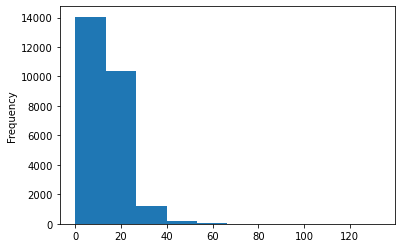

In [50]:
PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].plot(kind='hist')

# sns.histplot(data=avg_inspection_score, x="AVG. SCORE", kde=True)

12.000000     1101
10.000000      951
11.000000      905
13.000000      885
9.000000       784
              ... 
34.100000        1
25.625000        1
25.416667        1
27.375000        1
107.000000       1
Name: AVG. SCORE, Length: 965, dtype: int64


<AxesSubplot:ylabel='AVG. SCORE'>

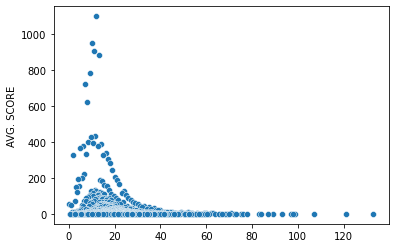

In [51]:
# visuallization - distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

avg_inspection_score_count = PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].value_counts()
print(avg_inspection_score_count)

#avg_inspection_score_count.plot(y='AVG. SCORE', kind='line')
sns.scatterplot(data=avg_inspection_score_count)

# NOTICE: outliers of the avg. inspection scores are subeject to target screenining
# since there are only 2 years of records applied to the modeling, the average score by year doesn't make sense, 
# rather comparison of each inspection would make more sense




A list of avg_inspection_score_A:
 0          9.8
20         8.0
22        10.0
27        13.5
34        11.5
          ... 
268974     9.0
268977    13.0
268980    13.0
268997    12.0
269059    13.0
Name: AVG. SCORE, Length: 14790, dtype: float64


A list of avg_inspection_score_B:
 12        14.333333
55        14.000000
77        19.166667
99        23.750000
121       16.000000
            ...    
268988    17.000000
269004    19.000000
269037    19.000000
269049    14.000000
269053    21.000000
Name: AVG. SCORE, Length: 9761, dtype: float64


A list of avg_inspection_score_C:
 1226      29.000000
1235      33.250000
1858      32.166667
2303      32.333333
2438      28.833333
            ...    
268999    29.000000
269024    33.000000
269032    29.000000
269042    30.000000
269062    31.000000
Name: AVG. SCORE, Length: 1125, dtype: float64


A list of avg_inspection_score_severe:
 17732     67.000000
31793     56.666667
206966    52.000000
208750    56.000000
217782    71.000000


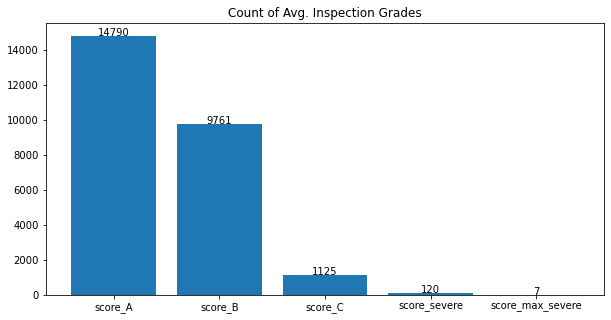

The ratio of the average inspection grade greater or equal to Grade C is:
 4.852148974925397%.




In [52]:
# counting the number of restaurants by the inspection Grades 
# restaurants with avg. inspection score below 14 (Grade A)
avg_inspection_score_A = PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].loc[PC_inspection_factor_2_average_score_per_date['AVG. SCORE'] < 14]
print("\n\nA list of avg_inspection_score_A:\n", avg_inspection_score_A)
score_A = avg_inspection_score_A.count()

# restaurants with avg. inspection score of 14-27 (Grade B)
avg_inspection_score_B = PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].loc[PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].between(14, 27)]
print("\n\nA list of avg_inspection_score_B:\n", avg_inspection_score_B)
score_B = avg_inspection_score_B.count()

# restaurants with avg. inspection score of 28-49 (Grade C)
avg_inspection_score_C = PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].loc[PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].between(28, 49)]
print("\n\nA list of avg_inspection_score_C:\n", avg_inspection_score_C)
score_C = avg_inspection_score_C.count()

# restaurants with avg. inspection score of 50-89
avg_inspection_score_severe = PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].loc[PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].between(50, 89)]
print("\n\nA list of avg_inspection_score_severe:\n", avg_inspection_score_severe)
score_severe = avg_inspection_score_severe.count()

# restaurants with avg. inspection score above 90s
avg_inspection_score_max_severe = PC_inspection_factor_2_average_score_per_date['AVG. SCORE'].loc[PC_inspection_factor_2_average_score_per_date['AVG. SCORE'] > 89]
print("\n\nA list of avg_inspection_score_max_severe:\n", avg_inspection_score_max_severe)
score_max_severe = avg_inspection_score_max_severe.count()



# plotting
#grades = {'score_A':score_A, 'score_B':score_B, 'score_C':score_C, 'score_severe':score_severe, 'score_max_severe':score_max_severe}
#names = list(grades.keys())
#values = list(grades.values())
#plt.bar(range(len(grades)), values, tick_label=names)
#plt.show()

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = ['score_A', 'score_B', 'score_C', 'score_severe', 'score_max_severe'] 
    y = [score_A, score_B, score_C, score_severe, score_max_severe]

    # setting figure size by using figure() function 
    plt.figure(figsize = (10, 5))

    # making the bar chart on the data
    plt.bar(x, y)

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("Count of Avg. Inspection Grades")

    # visualizing the plot
    plt.show()


score_c_greater_equal_ratio = (score_C+score_severe+score_max_severe) / (score_A+score_B+score_C+score_severe+score_max_severe)*100
print(f'The ratio of the average inspection grade greater or equal to Grade C is:\n {score_c_greater_equal_ratio}%.\n\n')




# NOTICE: can leverage the concept of the inspection grade to the average inspection score per restaurant for measureing riskiness 
# what number to be set as an indicator/cutoff of riskiness???



In [53]:
# counting values of data to see the most popular values
inspection_count_per_year = one_score_record_per_inspection_date['INSPECTION YEAR'].value_counts()
print(inspection_count_per_year)

print("\nThe average daily inspection number in 2021 is: ", 7576/365)
print("The average daily inspection number in 2020 is: ", 9303/365)
print("The average daily inspection number in 2019 is: ", 43563/365)
print("The average daily inspection number in 2018 is: ", 30035/365)
      

2019    43563
2018    30035
2020     9303
2021     7576
Name: INSPECTION YEAR, dtype: int64

The average daily inspection number in 2021 is:  20.756164383561643
The average daily inspection number in 2020 is:  25.487671232876714
The average daily inspection number in 2019 is:  119.35068493150685
The average daily inspection number in 2018 is:  82.28767123287672


In [54]:
# average inspection number per day in 2021
inspection_2021 = one_score_record_per_inspection_date.loc[one_score_record_per_inspection_date['INSPECTION YEAR'] == 2021].count()
inspection_2021

inspection_2021/365
inspection_2021_daily = inspection_2021/365     
print("\n\nThe average daily inspection number in 2021 is:", inspection_2021_daily)


# average inspection number per day in 2020
inspection_2020 = one_score_record_per_inspection_date.loc[one_score_record_per_inspection_date['INSPECTION YEAR'] == 2020].count()
inspection_2020

inspection_2020/365
inspection_2020_daily = inspection_2020/365    
print("\n\nThe average daily inspection number in 2020 is:", inspection_2020_daily)


# average inspection number per day in 2019
inspection_2019 = one_score_record_per_inspection_date.loc[one_score_record_per_inspection_date['INSPECTION YEAR'] == 2019].count()
inspection_2019

inspection_2019/365
inspection_2019_daily = inspection_2019/365    
print("\n\nThe average daily inspection number in 2019 is:", inspection_2019_daily)


# average inspection number per day in 2018
inspection_2018 = one_score_record_per_inspection_date.loc[one_score_record_per_inspection_date['INSPECTION YEAR'] == 2018].count()
inspection_2018

inspection_2018/365
inspection_2018_daily = inspection_2018/365    
print("\n\nThe average daily inspection number in 2018 is:", inspection_2018_daily)




# NOTICE: 7576 (30.425703*249) NYC restaurants were inspected on in 2021. (21.401130*354)
#         Total NYC restaurants number in 2019 was 23,650, which takes up 32%. (7576/23650)
# NOTICE: 30 NYC restaurants were inspected daily on average in 2021 according to the inspection result file


# NOTICE: 9303 (26.279661*249) NYC restaurants were inspected on in 2020. 
#         Total NYC restaurants number in 2019 was 23,650, which takes up 39%. (9303/23650)  
# NOTICE: 37 NYC restaurants were inspected daily on average in 2020 according to the inspection result file




# getting one score record per inspection for calculating the avg. inspection score
# (Multiple socre records for the same inspection date per violation code)
#one_score_record_per_inspection_date = PC_inspection_sorted.loc[PC_inspection_sorted.groupby(["CAMIS", "INSPECTION DATE"])["SCORE"].idxmax()] 
#one_score_record_per_inspection_date.head(50)



The average daily inspection number in 2021 is: CAMIS                    20.756164
DBA                      20.756164
BORO                     20.756164
BUILDING                 20.747945
STREET                   20.756164
ZIPCODE                  20.756164
PHONE                    20.756164
CUISINE DESCRIPTION      20.756164
INSPECTION DATE          20.756164
ACTION                   20.756164
VIOLATION CODE           20.438356
VIOLATION DESCRIPTION    20.476712
CRITICAL FLAG            20.756164
SCORE                    20.756164
GRADE                    12.884932
GRADE DATE               11.219178
RECORD DATE              20.756164
INSPECTION TYPE          20.756164
Latitude                 20.742466
Longitude                20.742466
Community Board          20.515068
Council District         20.515068
Census Tract             20.515068
BIN                      20.400000
BBL                      20.726027
NTA                      20.515068
INSPECTION YEAR          20.756164
LATES

## Risk Factor 2-2: Median score

In [55]:
median_score = one_score_record_per_inspection_date.groupby('CAMIS')['SCORE'].agg('median')
median_score.head(50)

CAMIS
30075445     7.0
30112340    13.0
30191841     8.0
40356018    10.0
40356483    13.5
40356731    11.5
40357217    10.0
40359480     8.0
40359705    11.0
40360045     8.0
40360076    12.0
40361618    12.0
40361998     6.0
40362264    17.0
40362274    23.5
40362432    10.0
40362715    12.5
40362869    12.0
40363098    11.0
40363298     8.5
40363426     8.5
40363427    12.0
40363565    13.0
40363630    17.0
40363834    11.0
40363920     3.0
40363945    12.5
40364179    17.5
40364220    10.0
40364296    21.0
40364299    12.5
40364305    11.0
40364335     7.0
40364347    13.0
40364362    10.0
40364363     9.5
40364373    15.5
40364389    12.0
40364404     9.5
40364439    22.5
40364443     9.5
40364449    10.5
40364467    25.5
40364518    10.0
40364531     8.5
40364572     9.0
40364581    12.5
40364668    12.0
40364681     8.0
40364691    10.0
Name: SCORE, dtype: float64

In [56]:
median_score = one_score_record_per_inspection_date.groupby('CAMIS')['SCORE'].agg('median')
df_median_score = pd.DataFrame(median_score)
df_median_score = df_median_score.rename(columns={"SCORE": "MEDIAN SCORE"})

df_median_score

,MEDIAN SCORE
CAMIS,
30075445,7.0
30112340,13.0
30191841,8.0
40356018,10.0
40356483,13.5
...,...
50117365,30.0
50117424,14.0
50117434,21.0


In [57]:
# adding the column 'MEDIAN SCORE' to the dataframe 'PC_inspection_factor_2'
PC_inspection_factor_3_median_score = pd.merge(PC_inspection_factor_2_average_score_per_date, df_median_score, on="CAMIS")
PC_inspection_factor_3_median_score


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25936,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,30.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.758849,-73.830119,407,20,87100,4449971,4050370152,QN22,2021,30.0,30.000000,30.0
25937,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,14.0,N,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.705180,-73.906199,405,34,54900,4082941,4034680039,QN20,2021,14.0,14.000000,14.0
25938,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.755582,-73.885150,403,25,32700,4034495,4014120043,QN28,2021,21.0,21.000000,21.0
25939,50117547,ORIGINAL JOE'S PIZZA,Bronx,2136,WILLIAMSBRIDGE ROAD,10461,9149075052,Pizza,2021-12-13,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2021-12-13,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.856045,-73.855644,211,13,28800,2049259,2043100052,BX49,2021,13.0,13.000000,13.0


In [58]:
# exploring the average inspection scores for the entire dataset
PC_inspection_factor_3_median_score.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE
count,2.594100e+04,25941.000000,25941.000000,25900.000000,25900.000000,25430.000000,25431.000000,25431.000000,2.529200e+04,2.583800e+04,25941.000000,25941.000000,25941.000000,25941.000000
mean,4.699045e+07,10511.465017,16.182106,40.086879,-72.778609,249.099843,20.049428,28978.271794,2.517477e+06,2.400231e+09,2018.613006,12.563201,14.318617,13.026271
std,4.228799e+06,1459.301368,13.364359,5.071974,9.207775,131.265201,15.799243,30748.230689,1.354439e+06,1.349017e+09,0.921096,9.155913,7.809116,7.417353
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.000000,0.000000
25%,4.154023e+07,10021.000000,9.000000,40.685743,-73.989027,105.000000,4.000000,8000.000000,1.044840e+06,1.010360e+09,2018.000000,8.000000,9.500000,9.000000
50%,5.004366e+07,10467.000000,12.000000,40.732542,-73.958545,301.000000,20.000000,16100.000000,3.007304e+06,3.001520e+09,2018.000000,11.000000,12.857143,12.000000
75%,5.008309e+07,11228.000000,20.000000,40.761858,-73.898950,401.000000,34.000000,40502.000000,4.001512e+06,4.001620e+09,2019.000000,13.000000,17.750000,15.000000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000,133.000000


<AxesSubplot:ylabel='Frequency'>

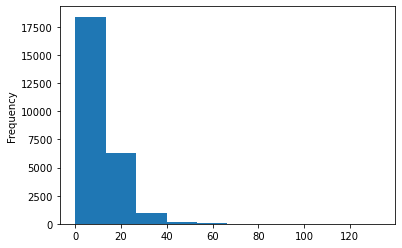

In [59]:
PC_inspection_factor_3_median_score['MEDIAN SCORE'].plot(kind='hist')

# sns.histplot(data=df_median_score, x="MEDIAN SCORE", kde=True)

12.0     3005
13.0     2320
10.0     1795
11.0     1746
9.0      1342
         ... 
133.0       1
97.0        1
48.5        1
60.5        1
107.0       1
Name: MEDIAN SCORE, Length: 145, dtype: int64


<AxesSubplot:ylabel='MEDIAN SCORE'>

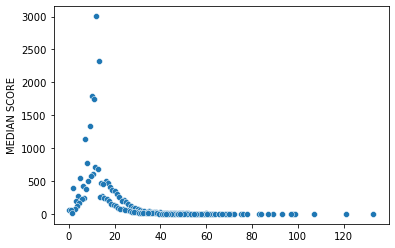

In [60]:
# visuallization - distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

midean_score_count = PC_inspection_factor_3_median_score['MEDIAN SCORE'].value_counts()
print(midean_score_count)

#avg_inspection_score_count.plot(y='AVG. SCORE', kind='line')
sns.scatterplot(data=midean_score_count)

# NOTICE: outliers of the avg. inspection scores are subeject to target screenining

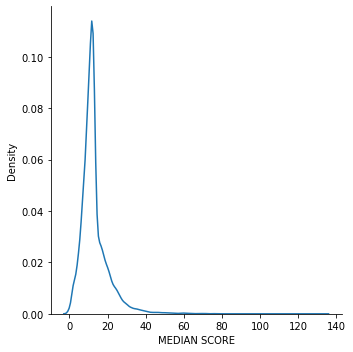

In [61]:
sns.displot(PC_inspection_factor_3_median_score, x='MEDIAN SCORE', kind="kde")


## Risk Factor 3: Inspection frequency per year

In [62]:
PC_inspection.sort_values(by='CAMIS')

# finding out restaurants with more than 2 inspection results and if they have different/ improved score
PC_inspection_multiple = PC_inspection.groupby('CAMIS')['INSPECTION DATE'].nunique()/PC_inspection.groupby('CAMIS')['INSPECTION YEAR'].nunique()
PC_inspection_multiple.head(50)

df_inspection_frequency = pd.DataFrame(data=PC_inspection_multiple)
df_inspection_frequency.columns =['INSP FREQ']               # COUNT of INSPECTION DATE
df_inspection_frequency


,INSP FREQ
CAMIS,
30075445,2.5
30112340,1.5
30191841,1.0
40356018,1.0
40356483,1.0
...,...
50117365,1.0
50117424,1.0
50117434,1.0


In [63]:
# adding the column 'INSP FREQ' to the dataframe 'PC_inspection_factor_3'
PC_inspection_factor_4_insp_freq = pd.merge(PC_inspection_factor_3_median_score, df_inspection_frequency, on="CAMIS")
PC_inspection_factor_4_insp_freq = PC_inspection_factor_4_insp_freq.sort_values(by='CAMIS', ascending=True)

PC_inspection_factor_4_insp_freq
PC_inspection_factor_4_insp_freq.head(50)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.500000
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.500000
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.000000
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.000000
5,40356731,TASTE THE TROPICS ICE CREAM,Brooklyn,1839,NOSTRAND AVENUE,11226,7188560821,Frozen Desserts,2019-05-31,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,2019-05-31,2022-01-29,Cycle Inspection / Initial Inspection,40.640795,-73.948488,317,45,82800,3112318,3049640001,BK95,2019,13.0,11.500000,11.5,1.000000
6,40357217,WILD ASIA,Bronx,2300,SOUTHERN BOULEVARD,10460,7182207846,American,2019-05-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-05-22,2022-01-29,Cycle Inspection / Initial Inspection,40.850556,-73.882451,206,15,33400,2116700,2031200020,BX99,2019,10.0,10.000000,10.0,1.000000
7,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,2128793900,American,2018-09-28,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2018-09-28,2022-01-29,Cycle Inspection / Initial Inspection,40.768547,-73.969581,108,4,12200,1041159,1013810001,MN40,2018,9.0,8.000000,8.0,1.000000
8,40359705,NATHAN'S FAMOUS,Brooklyn,1310,SURF AVENUE,11224,7183332202,Hotdogs,2018-03-07,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,2018-03-07,2022-01-29,Cycle Inspection / Initial Inspection,40.575537,-73.981652,313,47,35200,3189660,3070740340,BK21,2018,12.0,11.000000,11.0,1.000000
9,40360045,SEUDA FOODS,Brooklyn,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2019-12-06,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,8.0,A,2019-12-06,2022-01-29,Cycle Inspection / Initial Inspection,40.606187,-73.965466,315,44,41800,3177501,3066640028,BK25,2019,8.0,8.000000,

In [64]:
# getting the number of restaurants in the dataset
PC_inspection_factor_4_insp_freq['CAMIS'].value_counts()

# there are inspection results from 25941 restaurants

30075445    1
50071835    1
50071893    1
50071889    1
50071879    1
           ..
41704296    1
41704282    1
41704249    1
41704189    1
50117597    1
Name: CAMIS, Length: 25941, dtype: int64

In [65]:
# exploring the average inspection scores for the entire dataset
PC_inspection_factor_4_insp_freq.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
count,2.594100e+04,25941.000000,25941.000000,25900.000000,25900.000000,25430.000000,25431.000000,25431.000000,2.529200e+04,2.583800e+04,25941.000000,25941.000000,25941.000000,25941.000000,25941.000000
mean,4.699045e+07,10511.465017,16.182106,40.086879,-72.778609,249.099843,20.049428,28978.271794,2.517477e+06,2.400231e+09,2018.613006,12.563201,14.318617,13.026271,1.697952
std,4.228799e+06,1459.301368,13.364359,5.071974,9.207775,131.265201,15.799243,30748.230689,1.354439e+06,1.349017e+09,0.921096,9.155913,7.809116,7.417353,0.857553
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.000000,0.000000,1.000000
25%,4.154023e+07,10021.000000,9.000000,40.685743,-73.989027,105.000000,4.000000,8000.000000,1.044840e+06,1.010360e+09,2018.000000,8.000000,9.500000,9.000000,1.000000
50%,5.004366e+07,10467.000000,12.000000,40.732542,-73.958545,301.000000,20.000000,16100.000000,3.007304e+06,3.001520e+09,2018.000000,11.000000,12.857143,12.000000,1.500000
75%,5.008309e+07,11228.000000,20.000000,40.761858,-73.898950,401.000000,34.000000,40502.000000,4.001512e+06,4.001620e+09,2019.000000,13.000000,17.750000,15.000000,2.000000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000,133.000000,7.000000


In [66]:
# standardization
# copy the data
df_sklearn = PC_inspection_factor_4_insp_freq.copy()
  
# apply normalization techniques
column = 'INSP FREQ'
df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))
  
# view normalized data  
display(df_sklearn)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,0.250000
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,0.083333
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,0.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,0.000000
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25936,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,30.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.758849,-73.830119,407,20,87100,4449971,4050370152,QN22,2021,30.0,30.000000,30.0,0.000000
25937,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,14.0,N,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.705180,-73.906199,405,34,54900,4082941,4034680039,QN20,2021,14.0,14.000000,14.0,0.000000
25938,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.755582,-73.885150,403,25,32700,4034495,4014120043,QN28,2021,21.0,21.000000,21.0,0.000000
25939,50117547,ORIGINAL JOE'S PIZZA,Bronx,2136,WILLIAMSBRIDGE ROAD,10461,9149075052,Pizza,2021-12-13,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2021-12-13,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.856045,-73.855644,211,13,28800,2049259,2043100052,BX49,2021,13.0,13.000000,13.0,0.000000


<AxesSubplot:ylabel='Frequency'>

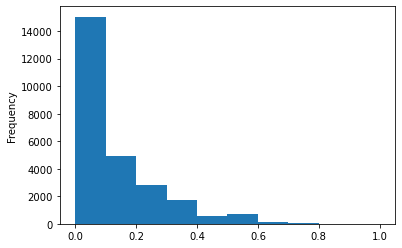

In [67]:
df_sklearn['INSP FREQ'].plot(kind='hist')

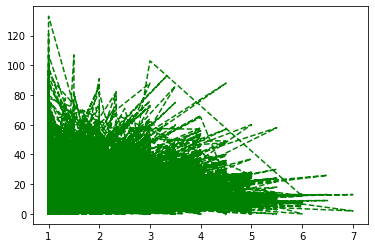

In [68]:
# poltting the relationship between INSP FREQ & GRADE
# Restaurants with Grade A should have one insection per year while B should have 2 per year

x = PC_inspection_factor_4_insp_freq['INSP FREQ']
y = PC_inspection_factor_4_insp_freq['LATEST SCORE']

plt.plot(x, y, 'g--')


#### Foundings about Inspection Frequency of 5

In [69]:
# extracting certain data by filtering
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/
#MASTER_dropped[(MASTER_dropped['INSP FREQ']=='B') & (MASTER_dropped['LATEST SCORE'] > 13)]
PC_inspection_factor_4_insp_freq[(PC_inspection_factor_4_insp_freq['INSP FREQ']==5) 
                                 & (PC_inspection_factor_4_insp_freq['LATEST SCORE'] < 14)]


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
424,40388260,AMNON KOSHER PIZZA,Brooklyn,4814,13 AVENUE,11219,7188511759,Jewish/Kosher,2019-02-26,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,24.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.635440,-73.991695,312,44,22000,3137423,3056340042,BK88,2019,12.0,24.6,21.0,5.0
495,40391808,IHOP,Queens,254-02,ROCKAWAY BOULEVARD,11422,7189786689,Pancakes/Waffles,2019-03-25,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.635568,-73.740111,413,31,66400,4292125,4139210001,QN05,2019,11.0,12.2,11.0,5.0
589,40395505,PORTO PRINCE STAR RESTAURANT,Queens,221-13,LINDEN BOULEVARD,11411,7185259006,Caribbean,2018-03-24,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,24.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.694804,-73.739057,413,27,59600,4540025,4113220005,QN33,2018,8.0,18.0,12.0,5.0
611,40396020,LA CONTENTA OESTE,Manhattan,78,WEST 11 STREET,10011,2125332233,Mexican,2019-02-05,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.734974,-73.997326,102,3,6300,1009510,1005740007,MN23,2019,11.0,16.8,17.0,5.0
612,40396037,SMILER'S DELI,Manhattan,532,MADISON AVENUE,10022,2126441090,Sandwiches,2019-05-16,Establishment Closed by DOHMH. Violations were...,04M,Live roaches present in facility's food and/or...,Critical,117.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.760456,-73.973707,105,4,10200,1035744,1012900015,MN17,2019,11.0,38.2,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22201,50095107,EROS MEZE,Manhattan,447,3 AVENUE,10016,2122521972,Greek,2019-07-05,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,73.0,NaN,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.743673,-73.979603,106,2,7000,1019971,1009110064,MN20,2019,9.0,29.6,20.0,5.0
22217,50095140,CHARO BROS RESTAURANT,Queens,4042,JUNCTION BLVD,11368,3478320335,Latin American,2021-10-28,Establishment Closed by DOHMH. Violations were...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,20.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.748159,-73.868824,404,21,46500,4039843,4015960029,QN29,2021,3.0,21.4,20.0,5.0
23296,50100492,BAP JIP,Queens,2908,UNION ST,11354,7189614742,Korean,2019-11-08,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,53.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.771741,-73.826584,407,20,88901,4100730,4043430090,QN22,2019,2.0,26.4,30.0,5.0
24690,50106610,3 BROS 99 CENTS PIZZA,Queens,2503,30TH AVE,11102,9292789914,Pizza,2021-07-19,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.768562,-73.924948,401,22,7100,4006875,4005740132,QN71,2021,9.0,35.4,19.0,5.0


In [70]:
# checking raw data to see details of all rows of data
# reading in file
inspection_raw= pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
inspection_raw.head()

inspection_raw = inspection_raw.sort_values(by='CAMIS')


# create a column to get inspection year
#inspection_raw['INSPECTION YEAR'] = pd.DatetimeIndex(inspection_raw['INSPECTION DATE']).year
#inspection_raw.head().sort_values(by='CAMIS', ascending=False)
#inspection_raw


# finding out restaurants with more than 2 inspection results and if they have different/ improved score
#inspection_raw_multiple = inspection_raw.groupby('CAMIS')['INSPECTION DATE'].nunique()/inspection_raw.groupby('CAMIS')['INSPECTION YEAR'].nunique()
#inspection_raw_multiple.head(50)

#inspection_raw_frequency = pd.DataFrame(data=PC_inspection_multiple)
#inspection_raw_frequency.columns =['INSP FREQ']               # COUNT of INSPECTION DATE
#inspection_raw_frequency



In [71]:
# checking raw data to see details of all rows of data
ins_freq_5_first = inspection_raw[(inspection_raw['CAMIS']==50090224)].sort_values(by='INSPECTION DATE')

ins_freq_5_first[['CAMIS','BORO','CUISINE DESCRIPTION','INSPECTION DATE','ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
            'CRITICAL FLAG','SCORE','GRADE','GRADE DATE','RECORD DATE','INSPECTION TYPE']]


,CAMIS,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
4429,50090224,Brooklyn,Bottled Beverages,1/14/2020,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,79.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
301601,50090224,Brooklyn,Bottled Beverages,1/14/2020,Establishment Closed by DOHMH. Violations were...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,79.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
179367,50090224,Brooklyn,Bottled Beverages,1/14/2020,Establishment Closed by DOHMH. Violations were...,05H,"No facilities available to wash, rinse and san...",Critical,79.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
189206,50090224,Brooklyn,Bottled Beverages,1/14/2020,Establishment Closed by DOHMH. Violations were...,04L,Evidence of mice or live mice present in facil...,Critical,79.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
274719,50090224,Brooklyn,Bottled Beverages,1/14/2020,Establishment Closed by DOHMH. Violations were...,04A,Food Protection Certificate not held by superv...,Critical,79.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
160120,50090224,Brooklyn,Bottled Beverages,2/10/2020,Establishment Closed by DOHMH. Violations were...,04L,Evidence of mice or live mice present in facil...,Critical,32.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
66135,50090224,Brooklyn,Bottled Beverages,2/10/2020,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,32.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
62611,50090224,Brooklyn,Bottled Beverages,2/13/2020,Establishment Closed by DOHMH. Violations were...,04L,Evidence of mice or live mice present in facil...,Critical,10.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
141370,50090224,Brooklyn,Bottled Beverages,2/13/2020,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
275937,50090224,Brooklyn,Bottled Beverages,2/19/2020,Establishment re-opened by DOHMH.,08A,Facility not vermin proof. Harborage or condit...,Not Critical,9.0,Z,2/19/2020,1/29/2022,Pre-permit (Operational) / Reopening Inspection


In [72]:
# checking raw data to see details of all rows of data
ins_freq_5_second = inspection_raw[(inspection_raw['CAMIS']==50095140)].sort_values(by='INSPECTION DATE')

ins_freq_5_second[['CAMIS','BORO','CUISINE DESCRIPTION','INSPECTION DATE','ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
            'CRITICAL FLAG','SCORE','GRADE','GRADE DATE','RECORD DATE','INSPECTION TYPE']]



,CAMIS,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
12474,50095140,Queens,Latin American,10/28/2021,Establishment Closed by DOHMH. Violations were...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,20.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
44586,50095140,Queens,Latin American,10/28/2021,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
125920,50095140,Queens,Latin American,10/28/2021,Establishment Closed by DOHMH. Violations were...,10F,Non-food contact surface improperly constructe...,Not Critical,20.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
355004,50095140,Queens,Latin American,10/28/2021,Establishment Closed by DOHMH. Violations were...,04M,Live roaches present in facility's food and/or...,Critical,20.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
269387,50095140,Queens,Latin American,10/28/2021,Establishment Closed by DOHMH. Violations were...,10B,Plumbing not properly installed or maintained;...,Not Critical,20.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Initial Inspection
112387,50095140,Queens,Latin American,11/3/2021,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,36.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
235042,50095140,Queens,Latin American,11/3/2021,Establishment Closed by DOHMH. Violations were...,04M,Live roaches present in facility's food and/or...,Critical,36.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
146739,50095140,Queens,Latin American,11/3/2021,Establishment Closed by DOHMH. Violations were...,10B,Plumbing not properly installed or maintained;...,Not Critical,36.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
20385,50095140,Queens,Latin American,11/3/2021,Establishment Closed by DOHMH. Violations were...,10F,Non-food contact surface improperly constructe...,Not Critical,36.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
31271,50095140,Queens,Latin American,11/5/2021,Establishment re-opened by DOHMH.,10F,Non-food contact surface improperly constructe...,Not Critical,3.0,P,11/5/2021,1/29/2022,Pre-permit (Operational) / Reopening Inspection


In [73]:
# checking raw data to see details of all rows of data
ins_freq_5_third = inspection_raw[(inspection_raw['CAMIS']==50106610)].sort_values(by='INSPECTION DATE')

ins_freq_5_third[['CAMIS','BORO','CUISINE DESCRIPTION','INSPECTION DATE','ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
            'CRITICAL FLAG','SCORE','GRADE','GRADE DATE','RECORD DATE','INSPECTION TYPE']]

,CAMIS,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
97231,50106610,Queens,Pizza,11/17/2021,Establishment Closed by DOHMH. Violations were...,04L,Evidence of mice or live mice present in facil...,Critical,65.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
369587,50106610,Queens,Pizza,11/17/2021,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,65.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
79456,50106610,Queens,Pizza,11/17/2021,Establishment Closed by DOHMH. Violations were...,04A,Food Protection Certificate not held by superv...,Critical,65.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
359413,50106610,Queens,Pizza,11/17/2021,Establishment Closed by DOHMH. Violations were...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,65.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
337736,50106610,Queens,Pizza,11/17/2021,Establishment Closed by DOHMH. Violations were...,10F,Non-food contact surface improperly constructe...,Not Critical,65.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
213417,50106610,Queens,Pizza,11/17/2021,Establishment Closed by DOHMH. Violations were...,02B,Hot food item not held at or above 140º F.,Critical,65.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
182369,50106610,Queens,Pizza,11/19/2021,Establishment Closed by DOHMH. Violations were...,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
204517,50106610,Queens,Pizza,11/19/2021,Establishment Closed by DOHMH. Violations were...,04N,Filth flies or food/refuse/sewage-associated (...,Critical,19.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
216504,50106610,Queens,Pizza,11/19/2021,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,19.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection
86742,50106610,Queens,Pizza,11/19/2021,Establishment Closed by DOHMH. Violations were...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,19.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Reopening Inspection


In [74]:
# checking raw data to see details of all rows of data
ins_freq_5_fourth = inspection_raw[(inspection_raw['CAMIS']==50112035)].sort_values(by='INSPECTION DATE')

ins_freq_5_fourth[['CAMIS','BORO','CUISINE DESCRIPTION','INSPECTION DATE','ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
            'CRITICAL FLAG','SCORE','GRADE','GRADE DATE','RECORD DATE','INSPECTION TYPE']]


,CAMIS,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
78746,50112035,Brooklyn,Chinese,11/1/2021,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,28.0,C,11/1/2021,1/29/2022,Pre-permit (Operational) / Re-inspection
4487,50112035,Brooklyn,Chinese,11/1/2021,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,28.0,C,11/1/2021,1/29/2022,Pre-permit (Operational) / Re-inspection
351648,50112035,Brooklyn,Chinese,11/1/2021,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,28.0,C,11/1/2021,1/29/2022,Pre-permit (Operational) / Re-inspection
199891,50112035,Brooklyn,Chinese,11/1/2021,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,28.0,C,11/1/2021,1/29/2022,Pre-permit (Operational) / Re-inspection
352897,50112035,Brooklyn,Chinese,11/1/2021,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,28.0,C,11/1/2021,1/29/2022,Pre-permit (Operational) / Re-inspection
365877,50112035,Brooklyn,Chinese,11/1/2021,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,28.0,C,11/1/2021,1/29/2022,Pre-permit (Operational) / Re-inspection
318629,50112035,Brooklyn,Chinese,11/18/2021,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,64.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
60119,50112035,Brooklyn,Chinese,11/18/2021,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,64.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
60118,50112035,Brooklyn,Chinese,11/18/2021,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,64.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection
71374,50112035,Brooklyn,Chinese,11/18/2021,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,64.0,NaN,NaN,1/29/2022,Pre-permit (Operational) / Compliance Inspection


In [75]:
# worst players: most inspection frequency & stll not improved or bad gade
# extracting certain data by filtering
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/
#MASTER_dropped[(MASTER_dropped['INSP FREQ']=='B') & (MASTER_dropped['LATEST SCORE'] > 13)]
PC_inspection_factor_4_insp_freq[(PC_inspection_factor_4_insp_freq['INSP FREQ']==3) 
                                 & (PC_inspection_factor_4_insp_freq['LATEST SCORE'] > 50)]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
1374,40625667,TAQUERIA RESTAURANTE MI BARRIO,Brooklyn,3415,14 AVENUE,11218,7189729669,Mexican,2019-04-04,Establishment Closed by DOHMH. Violations were...,04L,Evidence of mice or live mice present in facil...,Critical,57.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.641906,-73.981356,312,39,22800,3125152,3053510062,BK88,2019,73.0,33.333333,23.0,3.0
1636,40723644,TEN DEGREES,Manhattan,121,ST MARKS PLACE,10009,2123588600,American,2018-02-12,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,36.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.727249,-73.984471,103,2,3200,1005882,1004360036,MN22,2018,60.0,30.833333,29.0,3.0
2887,41060762,PRIMO COFFEE CART,Manhattan,0,PENN STATION,10121,9735804185,Coffee/Tea,2018-02-16,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,56.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.750059,-73.992107,105,3,10100,1083026,1007810002,MN17,2018,103.0,56.666667,56.0,3.0
5656,41447273,KENNEDY PIZZA & CHICKEN,Brooklyn,294,NOSTRAND AVENUE,11216,7186381115,Chicken,2018-02-02,Establishment re-opened by DOHMH.,10J,Hand wash sign not posted,Not Critical,4.0,P,2018-02-02,2022-01-29,Cycle Inspection / Reopening Inspection,40.689667,-73.951439,303,36,24300,3049897,3017880056,BK75,2018,51.0,21.333333,9.0,3.0
5967,41477087,LE GAMIN,Brooklyn,108,FRANKLIN STREET,11222,7187707918,French,2018-03-14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,23.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.728286,-73.957321,301,33,56100,3064949,3025690008,BK76,2018,62.0,22.444444,19.0,3.0
6108,41491419,ITAL FUSION,Brooklyn,4705,CHURCH AVENUE,11203,3476638515,Vegetarian,2018-01-09,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,13.0,A,2018-01-09,2022-01-29,Cycle Inspection / Initial Inspection,40.651615,-73.933124,317,41,87000,3102019,3046730042,BK91,2018,76.0,36.500000,31.5,3.0
6812,41571021,OM INDIAN RESTAURANT,Manhattan,1593,2 AVENUE,10028,2126284500,Indian,2018-01-18,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,43.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.775681,-73.953351,108,5,13800,1048661,1015280028,MN32,2018,58.0,31.000000,28.0,3.0
6851,41574514,NANATORI JAPANESE RESTAURANT,Brooklyn,162,MONTAGUE STREET,11201,7185225555,Japanese,2018-02-08,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,29.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.694376,-73.992845,302,33,502,3002092,3002490042,BK09,2018,56.0,29.222222,29.0,3.0
6907,41579144,SALT AND PEPPER RESTAURANT & CAFE,Manhattan,139,WEST 33 STREET,10001,2122681919,Soups,2018-10-03,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,40.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.749631,-73.989443,105,3,10100,1015196,1008090016,MN17,2018,53.0,27.555556,29.0,3.0
8033,41664502,DELICIOUS JUICE BAR,Bronx,832,WESTCHESTER AVENUE,10455,3477587756,"Juice, Smoothies, Fruit Salads",2018-04-27,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,23.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.819443,-73.902045,201,17,7900,2004992,2026760049,BX34,2018,54.0,37.000000,34.0,3.0


In [76]:
PC_inspection_factor_4_insp_freq[(PC_inspection_factor_4_insp_freq['INSP FREQ']==3) 
                                 & (PC_inspection_factor_4_insp_freq['LATEST SCORE'] > 27)
                                 & (PC_inspection_factor_4_insp_freq['LATEST SCORE'] < 50)]


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
111,40366929,LITTLE BROWN JUG,Queens,124-02,JAMAICA AVENUE,11418,7188469609,American,2018-04-12,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,12.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.700794,-73.826448,409,29,14201,4196066,4093330001,QN54,2018,40.0,29.000000,35.0,3.0
675,40398688,MASTER WOK,Brooklyn,5100,KINGS PLAZA SHOPPING CT,11234,7182586943,Chinese,2018-04-23,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,17.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.609929,-73.922282,318,46,69800,3326830,3084700055,BK45,2018,35.0,24.111111,18.0,3.0
681,40398899,KNAPP ST PIZZA II,Brooklyn,261,AVENUE X,11223,7183760174,Pizza,2019-02-04,Establishment Closed by DOHMH. Violations were...,10F,Non-food contact surface improperly constructe...,Not Critical,45.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.590209,-73.973288,315,47,38600,3194400,3071730042,BK26,2019,45.0,27.500000,27.5,3.0
744,40400811,CAFE VOLNA,Brooklyn,3145,BRIGHTON 4 STREET,11235,7183320341,Russian,2018-03-22,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,31.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.575579,-73.962973,313,48,36002,3245105,3086907501,BK19,2018,43.0,44.555556,43.0,3.0
749,40401000,DOWNTOWN BAKERY II MEXICAN FOOD,Manhattan,69,1 AVENUE,10003,2122541757,Mexican,2019-02-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,28.0,C,2019-02-01,2022-01-29,Cycle Inspection / Re-inspection,40.725381,-73.986911,103,2,3800,1006217,1004460035,MN22,2019,30.0,21.000000,26.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20445,50087532,"IPIZZANY, KRISPY KRUNCHY CHICKEN",Manhattan,707,9 AVENUE,10019,2122456062,Chicken,2019-03-28,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,27.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.762471,-73.989701,104,3,12700,1026604,1010580032,MN15,2019,34.0,30.166667,29.0,3.0
20515,50087858,PUSH FITNESS CLUB OF FRESH MEADOWS,Queens,18810,UNION TPKE,11366,7184647874,"Juice, Smoothies, Fruit Salads",2019-04-16,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,5.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.729251,-73.780955,408,23,127700,4156312,4072660001,QN06,2019,30.0,10.166667,7.0,3.0
21154,50090295,KABAYAN RESTAURANT AND BAKERY,Queens,16118,UNION TPKE,11366,7183800802,Filipino,2019-04-23,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,23.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.720974,-73.805871,408,24,126500,4148448,4068560038,QN38,2019,39.0,23.000000,22.0,3.0
22539,50097106,GOLDEN CHINA,Bronx,2960,MIDDLETOWN ROAD,10461,7188288808,Chinese,2019-09-04,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,49.0,NaN,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.843759,-73.830902,210,13,26400,2074710,2053960001,BX52,2019,33.0,34.000000,33.0,3.0


In [77]:
PC_inspection_factor_4_insp_freq[(PC_inspection_factor_4_insp_freq['INSP FREQ']==4) 
                                 & (PC_inspection_factor_4_insp_freq['LATEST SCORE'] > 13)]


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
66,40365499,YANKEE TAVERN,Bronx,72,EAST 161 STREET,10451,7182926130,American,2019-02-14,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,18.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.827558,-73.925141,204,8,6300,2002983,2024830045,BX63,2019,21.0,20.750000,19.5,4.0
247,40373937,SHUN LEE,Manhattan,37,WEST 65 STREET,10023,2125958895,Chinese,2019-03-20,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.772274,-73.980363,107,6,14900,1028160,1011180005,MN14,2019,22.0,18.500000,17.0,4.0
1001,40536599,OLIVE TREE,Manhattan,1420,BROADWAY,10018,2128400999,American,2018-02-13,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,15.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.753904,-73.986981,105,4,11300,1015282,1008150049,MN17,2018,21.0,20.333333,20.0,4.0
1276,40597409,STROMBOLI PIZZA,Manhattan,83,ST MARKS PLACE,10003,2126733691,Pizza,2019-05-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.727746,-73.985648,103,2,3800,1077695,1004500033,MN22,2019,17.0,21.000000,20.0,4.0
1576,40707818,NUEVO JARDIN DE CHINA RESTAURANT,Queens,3205,BROADWAY,11106,7187260819,Chinese,2019-04-12,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,21.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.761532,-73.924440,401,22,6100,4008458,4006140107,QN70,2019,15.0,18.750000,18.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20867,50089179,GRAMMA'S PIZZA,Bronx,99,FEATHERBED LANE,10452,3472190000,Pizza,2019-03-11,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,50.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.846220,-73.918329,205,14,21502,2008811,2028760043,BX36,2019,18.0,23.250000,16.5,4.0
21168,50090335,MI BELLA GROCERY & DELI,Brooklyn,1904,BATH AVENUE,11214,7183738544,Spanish,2020-01-16,Establishment Closed by DOHMH. Violations were...,10H,Proper sanitization not provided for utensil w...,Not Critical,157.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.602547,-74.003652,311,43,28200,3168722,3064390029,BK27,2020,17.0,61.000000,35.0,4.0
21952,50093932,EL POLLO REAL RESTAURANT,Queens,6951,GRAND AVE,11378,9295079566,Latin American,2019-07-17,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,68.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.726861,-73.893783,405,30,49302,4058564,4025010038,QN30,2019,15.0,38.500000,37.0,4.0
22125,50094794,ELM PARK DELI AND GROCERY,Staten Island,127,MORNINGSTAR ROAD,10303,7184471722,Sandwiches,2019-10-02,Establishment Closed by DOHMH. Violations were...,10I,"Single service item reused, improperly stored,...",Not Critical,37.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.634881,-74.145717,501,49,21300,5026148,5011250010,SI28,2019,16.0,17.000000,14.5,4.0


In [78]:
PC_inspection_factor_4_insp_freq[(PC_inspection_factor_4_insp_freq['INSP FREQ']==3) 
                                 & (PC_inspection_factor_4_insp_freq['LATEST SCORE'] > 13)
                                 & (PC_inspection_factor_4_insp_freq['LATEST SCORE'] < 28)]



,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ
511,40392721,NUEVA VILLA CHINA RESTAURANT,Queens,3910,103 STREET,11368,7184761527,Chinese,2018-02-21,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2018-02-21,2022-01-29,Cycle Inspection / Re-inspection,40.750483,-73.863023,403,21,40700,4044366,4017700035,QN26,2018,15.0,17.222222,15.0,3.0
563,40394560,MARUMI,Manhattan,546,LA GUARDIA PLACE,10012,2129797055,Japanese,2018-01-02,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,16.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.728766,-73.998362,102,1,6500,1077840,1005370022,MN23,2018,23.0,14.000000,14.0,3.0
689,40399329,ARTE RESTAURANT,Manhattan,21,EAST 9 STREET,10003,2124730077,Italian,2018-04-03,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,37.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.732347,-73.994725,102,2,5900,1009240,1005670024,MN23,2018,23.0,19.500000,17.5,3.0
765,40401543,USA DINER,Queens,243-03,MERRICK BOULEVARD,11422,7189497933,American,2018-01-17,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.674071,-73.730024,413,31,61602,4279618,4129820027,QN05,2018,14.0,19.111111,14.0,3.0
846,40423830,CHAMPION BAKERY,Bronx,3978,WHITE PLAINS ROAD,10466,7187981203,Caribbean,2019-06-07,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,23.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.887983,-73.860341,212,12,40600,2063436,2048390044,BX44,2019,15.0,17.833333,16.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25047,50108259,KFC,Brooklyn,495,NOSTRAND AVENUE,11216,7186224108,Chicken,2021-07-22,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,41.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.680488,-73.949571,303,36,24900,3053259,3018490056,BK75,2021,15.0,20.333333,15.0,3.0
25395,50110324,LOS ANGELITOS BAKERY CAKE AND GRILL,Brooklyn,1708,86 STREET,11214,7188725999,Tex-Mex,2021-08-11,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,28.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.608410,-74.004577,311,43,17800,3166500,3063660041,BK27,2021,17.0,18.000000,17.0,3.0
25519,50111296,BIG WONG RESTAURANT,Manhattan,67,MOTT STREET,10013,2129640540,Chinese,2021-11-03,Establishment Closed by DOHMH. Violations were...,05D,Hand washing facility not provided in or near ...,Critical,80.0,NaN,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.716118,-73.998200,103,1,2900,1002397,1002000026,MN27,2021,22.0,37.666667,22.0,3.0
25686,50112733,TIANFU KING RESTAURANT,Queens,13335,ROOSEVELT AVE,11354,9544717327,Chinese,2021-07-09,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,30.0,NaN,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.758502,-73.833242,407,20,87100,4112276,4049730016,QN22,2021,27.0,28.666667,29.0,3.0


## Risk Factor 4: Critical violation code count per year

In [79]:
# counting the frequency of critical violation flag records per inspection date
Critical_Frequency = PC_inspection[(PC_inspection['CRITICAL FLAG'] == 'Critical')]   # finding rows of data of the column 'CRITICAL FLAG' that has value 'Critical' 
Critical_Frequency = Critical_Frequency.groupby('CAMIS')['INSPECTION DATE'].nunique()/PC_inspection.groupby('CAMIS')['INSPECTION YEAR'].nunique()
Critical_Frequency.sort_values(ascending=False)
Critical_Frequency

df_Critical_Frequency = pd.DataFrame(Critical_Frequency)
df_Critical_Frequency

# renaming the column name from 'INSPECTION DATE' to 'Crit FREQ'
df_Critical_Frequency = df_Critical_Frequency.rename(columns={'INSPECTION DATE': 'CRITICAL FREQ'})
df_Critical_Frequency

# there are inspection results from 24868 restaurants with critical flags

,0
CAMIS,
30075445,2.0
30112340,1.5
30191841,1.0
40356018,1.0
40356483,1.0
...,...
50117365,1.0
50117424,1.0
50117434,1.0


In [80]:
## results are inccorect.

# create for the count of critical violations
#Critical_Frequency=PC_inspection[~(PC_inspection['CRITICAL FLAG'] != 'Critical')]
#Critical_Frequency=Critical_Frequency.groupby('CAMIS')['CRITICAL FLAG'].count()/Critical_Frequency.groupby('CAMIS')['INSPECTION YEAR'].nunique()
#Critical_Frequency.sort_values(ascending=False)

#df_Critical_Frequency = pd.DataFrame(Critical_Frequency)
#df_Critical_Frequency = df_Critical_Frequency.rename(columns={0 :'Crit FREQ'})

#df_Critical_Frequency


In [81]:
# adding the column 'CRITICAL FREQ' to the dataframe 'PC_inspection_factor_4'
PC_inspection_factor_5_critical_freq = pd.merge(PC_inspection_factor_4_insp_freq, df_Critical_Frequency, on="CAMIS")
PC_inspection_factor_5_critical_freq = PC_inspection_factor_5_critical_freq.sort_values(by='CAMIS', ascending=True)
PC_inspection_factor_5_critical_freq = PC_inspection_factor_5_critical_freq.rename(columns={0 :'CRITICAL FREQ'})
PC_inspection_factor_5_critical_freq


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.5,2.0
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.5,1.5
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.0,1.0
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.0,1.0
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25936,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,30.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.758849,-73.830119,407,20,87100,4449971,4050370152,QN22,2021,30.0,30.000000,30.0,1.0,1.0
25937,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,14.0,N,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.705180,-73.906199,405,34,54900,4082941,4034680039,QN20,2021,14.0,14.000000,14.0,1.0,1.0
25938,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.755582,-73.885150,403,25,32700,4034495,4014120043,QN28,2021,21.0,21.000000,21.0,1.0,1.0
25939,50117547,ORIGINAL JOE'S PIZZA,Bronx,2136,WILLIAMSBRIDGE ROAD,10461,9149075052,Pizza,2021-12-13,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2021-12-13,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.856045,-73.855644,211,13,28800,2049259,2043100052,BX49,2021,13.0,13.000000,13.0,1.0,1.0


In [82]:
# exploring the average inspection scores for the entire dataset
PC_inspection_factor_5_critical_freq.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ
count,2.594100e+04,25941.000000,25941.000000,25900.000000,25900.000000,25430.000000,25431.000000,25431.000000,2.529200e+04,2.583800e+04,25941.000000,25941.000000,25941.000000,25941.000000,25941.000000,24868.000000
mean,4.699045e+07,10511.465017,16.182106,40.086879,-72.778609,249.099843,20.049428,28978.271794,2.517477e+06,2.400231e+09,2018.613006,12.563201,14.318617,13.026271,1.697952,1.563706
std,4.228799e+06,1459.301368,13.364359,5.071974,9.207775,131.265201,15.799243,30748.230689,1.354439e+06,1.349017e+09,0.921096,9.155913,7.809116,7.417353,0.857553,0.851080
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.000000,0.000000,1.000000,0.333333
25%,4.154023e+07,10021.000000,9.000000,40.685743,-73.989027,105.000000,4.000000,8000.000000,1.044840e+06,1.010360e+09,2018.000000,8.000000,9.500000,9.000000,1.000000,1.000000
50%,5.004366e+07,10467.000000,12.000000,40.732542,-73.958545,301.000000,20.000000,16100.000000,3.007304e+06,3.001520e+09,2018.000000,11.000000,12.857143,12.000000,1.500000,1.333333
75%,5.008309e+07,11228.000000,20.000000,40.761858,-73.898950,401.000000,34.000000,40502.000000,4.001512e+06,4.001620e+09,2019.000000,13.000000,17.750000,15.000000,2.000000,2.000000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000,133.000000,7.000000,7.000000


## Risk Factor 5: Average violation fine amount

In [83]:
#original table of fines per violation code can be found via: https://codelibrary.amlegal.com/codes/newyorkcity/latest/NYCrules/0-0-0-43593
#since the inspection dataset doesn't include the penalty condition level, the team has decided to assume that
#the maximum fine level will be charged to the violaton code

# read in fine amount per violation code


fine=pd.read_csv('Fines_by_Violation_Codes.csv')
df_Fine = pd.DataFrame(fine)

df_Fine


,VIOLATION CODE,FINE AMOUNT
0,02A,600
1,02B,600
2,02C,300
3,02D,300
4,02E,200
...,...,...
68,10D,200
69,10E,200
70,10F,200
71,10G,200


In [84]:
# adding the column 'FINE AMOUNT' to the dataframe 'PC_inspection_factor_5'
PC_inspection_factor_6_fine_amount = pd.merge(PC_inspection_factor_5_critical_freq, df_Fine, on="VIOLATION CODE").sort_values(by='CAMIS', ascending=True)
PC_inspection_factor_6_fine_amount

PC_inspection_factor_6_fine_amount.head(50)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.500000,2.000000,200
2216,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.500000,1.500000,200
2217,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.000000,1.000000,200
7230,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.000000,1.000000,300
9269,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.000000,1.000000,300
2218,40356731,TASTE THE TROPICS ICE CREAM,Brooklyn,1839,NOSTRAND AVENUE,11226,7188560821,Frozen Desserts,2019-05-31,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,2019-05-31,2022-01-29,Cycle Inspection / Initial Inspection,40.640795,-73.948488,317,45,82800,3112318,3049640001,BK95,2019,13.0,11.500000,11.5,1.000000,1.000000,200
11131,40357217,WILD ASIA,Bronx,2300,SOUTHERN BOULEVARD,10460,7182207846,American,2019-05-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-05-22,2022-01-29,Cycle Inspection / Initial Inspection,40.850556,-73.882451,206,15,33400,2116700,2031200020,BX99,2019,10.0,10.000000,10.0,1.000000,1.000000,350
2219,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,2128793900,American,2018-09-28,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2018-09-28,2022-01-29,Cycle Inspection / Initial Inspection,40.768547,-73.969581,108,4,12200,1041159,1013810001,MN40,2018,9.0,8.000000,8.0,1.000000,1.000000,200
9270,40359705,NATHAN'S FAMOUS,Brooklyn,1310,SURF AVENUE,11224,7183332202,Hotdogs,2018-03-07,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,2018-03-07,2022-01-29,Cycle Inspection / Initial Inspection,40.575537,-73.981652,313,47,35200,3189660,3070740340,BK21,2018,12.0,11.000000,11.0,1.000000,1.000000,300
7231,40360045,SEUDA FOODS,Brooklyn,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2019-12-06,Violations were cited in the following area(s).,06D,"Food contact surface not proper

In [85]:
# getting the number of restaurants in the dataset
PC_inspection_factor_6_fine_amount['CAMIS'].value_counts()


50099498    2
50086240    2
30075445    1
50071529    1
50071561    1
           ..
41701986    1
41701897    1
41701881    1
41701806    1
50117597    1
Name: CAMIS, Length: 25138, dtype: int64

In [86]:
# exploring the average inspection scores for the entire dataset
PC_inspection_factor_6_fine_amount.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT
count,2.514000e+04,25140.000000,25140.000000,25100.000000,25100.000000,24662.000000,24663.000000,24663.000000,2.452700e+04,2.504200e+04,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,24200.000000,25140.000000
mean,4.697353e+07,10517.103461,16.410979,40.112053,-72.823814,249.054132,20.011272,29012.526740,2.516733e+06,2.401146e+09,2018.610939,12.628083,14.443202,13.132399,1.704379,1.570389,317.901750
std,4.234530e+06,1436.103383,13.331934,4.973830,9.029520,131.367159,15.785310,30802.194037,1.355638e+06,1.349302e+09,0.919999,9.155382,7.776835,7.392637,0.860511,0.852411,147.034115
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.400000,0.000000,1.000000,0.333333,200.000000
25%,4.153568e+07,10021.000000,9.000000,40.686059,-73.988989,105.000000,4.000000,8000.000000,1.044372e+06,1.010370e+09,2018.000000,8.000000,9.500000,9.000000,1.000000,1.000000,200.000000
50%,5.004320e+07,10467.000000,12.000000,40.732762,-73.958392,301.000000,20.000000,16100.000000,3.006871e+06,3.001500e+09,2018.000000,11.000000,13.000000,12.000000,1.500000,1.333333,300.000000
75%,5.008281e+07,11228.000000,21.000000,40.761948,-73.898813,401.000000,34.000000,40502.000000,4.001934e+06,4.001680e+09,2019.000000,13.000000,17.857143,15.000000,2.000000,2.000000,350.000000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000,133.000000,7.000000,7.000000,1000.000000


In [87]:
# adding the column 'FINE AMOUNT' to the dataframe 'PC_inspection_factor_5'
PC_inspection_factor_6_fine_amount = pd.merge(PC_inspection_factor_5_critical_freq, df_Fine, on="VIOLATION CODE").sort_values(by='CAMIS', ascending=True)
PC_inspection_factor_6_fine_amount

PC_inspection_factor_6_fine_amount.head(50)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.500000,2.000000,200
2216,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.500000,1.500000,200
2217,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.000000,1.000000,200
7230,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.000000,1.000000,300
9269,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.000000,1.000000,300
2218,40356731,TASTE THE TROPICS ICE CREAM,Brooklyn,1839,NOSTRAND AVENUE,11226,7188560821,Frozen Desserts,2019-05-31,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,2019-05-31,2022-01-29,Cycle Inspection / Initial Inspection,40.640795,-73.948488,317,45,82800,3112318,3049640001,BK95,2019,13.0,11.500000,11.5,1.000000,1.000000,200
11131,40357217,WILD ASIA,Bronx,2300,SOUTHERN BOULEVARD,10460,7182207846,American,2019-05-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-05-22,2022-01-29,Cycle Inspection / Initial Inspection,40.850556,-73.882451,206,15,33400,2116700,2031200020,BX99,2019,10.0,10.000000,10.0,1.000000,1.000000,350
2219,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,2128793900,American,2018-09-28,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2018-09-28,2022-01-29,Cycle Inspection / Initial Inspection,40.768547,-73.969581,108,4,12200,1041159,1013810001,MN40,2018,9.0,8.000000,8.0,1.000000,1.000000,200
9270,40359705,NATHAN'S FAMOUS,Brooklyn,1310,SURF AVENUE,11224,7183332202,Hotdogs,2018-03-07,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,2018-03-07,2022-01-29,Cycle Inspection / Initial Inspection,40.575537,-73.981652,313,47,35200,3189660,3070740340,BK21,2018,12.0,11.000000,11.0,1.000000,1.000000,300
7231,40360045,SEUDA FOODS,Brooklyn,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2019-12-06,Violations were cited in the following area(s).,06D,"Food contact surface not proper

In [88]:
# getting the number of restaurants in the dataset
PC_inspection_factor_6_fine_amount['CAMIS'].value_counts()

# there are inspection results from 24198 restaurants

50099498    2
50086240    2
30075445    1
50071529    1
50071561    1
           ..
41701986    1
41701897    1
41701881    1
41701806    1
50117597    1
Name: CAMIS, Length: 25138, dtype: int64

In [89]:
# getting the sum of fine amounts per restaurant to make sure everything merged correctly
total_fine = PC_inspection_factor_6_fine_amount.groupby("CAMIS")["FINE AMOUNT"].sum()
df_total_fine = pd.DataFrame(total_fine)

df_total_fine.columns =["TOTAL FINE AMOUNT"]
df_total_fine

,TOTAL FINE AMOUNT
CAMIS,
30075445,200
30112340,200
30191841,200
40356018,300
40356483,300
...,...
50117365,350
50117424,200
50117434,350


In [90]:
# adding the column 'TOTAL FINE AMOUNT' to the dataframe 'PC_inspection_factor_6'
PC_inspection_factor_7_total_fine_amount = pd.merge(PC_inspection_factor_6_fine_amount, df_total_fine, on="CAMIS").sort_values(by='CAMIS', ascending=True)
PC_inspection_factor_7_total_fine_amount

PC_inspection_factor_7_total_fine_amount.head(50)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.500000,2.000000,200,200
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.500000,1.500000,200,200
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.000000,1.000000,200,200
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.000000,1.000000,300,300
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.000000,1.000000,300,300
5,40356731,TASTE THE TROPICS ICE CREAM,Brooklyn,1839,NOSTRAND AVENUE,11226,7188560821,Frozen Desserts,2019-05-31,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,2019-05-31,2022-01-29,Cycle Inspection / Initial Inspection,40.640795,-73.948488,317,45,82800,3112318,3049640001,BK95,2019,13.0,11.500000,11.5,1.000000,1.000000,200,200
6,40357217,WILD ASIA,Bronx,2300,SOUTHERN BOULEVARD,10460,7182207846,American,2019-05-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-05-22,2022-01-29,Cycle Inspection / Initial Inspection,40.850556,-73.882451,206,15,33400,2116700,2031200020,BX99,2019,10.0,10.000000,10.0,1.000000,1.000000,350,350
7,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,2128793900,American,2018-09-28,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2018-09-28,2022-01-29,Cycle Inspection / Initial Inspection,40.768547,-73.969581,108,4,12200,1041159,1013810001,MN40,2018,9.0,8.000000,8.0,1.000000,1.000000,200,200
8,40359705,NATHAN'S FAMOUS,Brooklyn,1310,SURF AVENUE,11224,7183332202,Hotdogs,2018-03-07,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,2018-03-07,2022-01-29,Cycle Inspection / Initial Inspection,40.575537,-73.981652,313,47,35200,3189660,3070740340,BK21,2018,12.0,11.000000,11.0,1.000000,1.000000,300,300
9,40360045,SEUDA FOODS,Brooklyn,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,2019-12-06,Violations were cited in the following area(s).,06D,"Food 

In [91]:
# adding the column 'AVG. FINE AMOUNT' to the dataframe 'PC_inspection_factor_7_total_fine_amount'
PC_inspection_factor_7_total_fine_amount["AVG. FINE AMOUNT"] = PC_inspection_factor_7_total_fine_amount["TOTAL FINE AMOUNT"]/PC_inspection_factor_7_total_fine_amount['INSP FREQ'] 
PC_inspection_factor_8_average_fine_amount = PC_inspection_factor_7_total_fine_amount
PC_inspection_factor_8_average_fine_amount
PC_inspection_factor_8_average_fine_amount.head(50)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.500000,2.000000,200,200,80.000000
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.500000,1.500000,200,200,133.333333
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.000000,1.000000,200,200,200.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.000000,1.000000,300,300,300.000000
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.000000,1.000000,300,300,300.000000
5,40356731,TASTE THE TROPICS ICE CREAM,Brooklyn,1839,NOSTRAND AVENUE,11226,7188560821,Frozen Desserts,2019-05-31,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,2019-05-31,2022-01-29,Cycle Inspection / Initial Inspection,40.640795,-73.948488,317,45,82800,3112318,3049640001,BK95,2019,13.0,11.500000,11.5,1.000000,1.000000,200,200,200.000000
6,40357217,WILD ASIA,Bronx,2300,SOUTHERN BOULEVARD,10460,7182207846,American,2019-05-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-05-22,2022-01-29,Cycle Inspection / Initial Inspection,40.850556,-73.882451,206,15,33400,2116700,2031200020,BX99,2019,10.0,10.000000,10.0,1.000000,1.000000,350,350,350.000000
7,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,2128793900,American,2018-09-28,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2018-09-28,2022-01-29,Cycle Inspection / Initial Inspection,40.768547,-73.969581,108,4,12200,1041159,1013810001,MN40,2018,9.0,8.000000,8.0,1.000000,1.000000,200,200,200.000000
8,40359705,NATHAN'S FAMOUS,Brooklyn,1310,SURF AVENUE,11224,7183332202,Hotdogs,2018-03-07,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,2018-03-07,2022-01-29,Cycle Inspection / Initial Inspection,40.575537,-73.981652,313,47,35200,3189660,3070740340,BK21,2018,12.0,11.000000,11.0,1.000000,1.000000,300,300,300.000000
9,40360045,SEUDA FOODS,Brooklyn,705

In [92]:
# getting the number of restaurants in the dataset
PC_inspection_factor_8_average_fine_amount['CAMIS'].value_counts()


50099498    2
50086240    2
30075445    1
50071529    1
50071561    1
           ..
41701986    1
41701897    1
41701881    1
41701806    1
50117597    1
Name: CAMIS, Length: 25138, dtype: int64

In [93]:
# exploring the average inspection scores for the entire dataset
PC_inspection_factor_8_average_fine_amount.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT
count,2.514000e+04,25140.000000,25140.000000,25100.000000,25100.000000,24662.000000,24663.000000,24663.000000,2.452700e+04,2.504200e+04,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,24200.000000,25140.000000,25140.000000,25140.000000
mean,4.697353e+07,10517.103461,16.410979,40.112053,-72.823814,249.054132,20.011272,29012.526740,2.516733e+06,2.401146e+09,2018.610939,12.628083,14.443202,13.132399,1.704379,1.570389,317.901750,317.969372,221.877815
std,4.234530e+06,1436.103383,13.331934,4.973830,9.029520,131.367159,15.785310,30802.194037,1.355638e+06,1.349302e+09,0.919999,9.155382,7.776835,7.392637,0.860511,0.852411,147.034115,147.164460,131.227807
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.400000,0.000000,1.000000,0.333333,200.000000,200.000000,28.571429
25%,4.153568e+07,10021.000000,9.000000,40.686059,-73.988989,105.000000,4.000000,8000.000000,1.044372e+06,1.010370e+09,2018.000000,8.000000,9.500000,9.000000,1.000000,1.000000,200.000000,200.000000,133.333333
50%,5.004320e+07,10467.000000,12.000000,40.732762,-73.958392,301.000000,20.000000,16100.000000,3.006871e+06,3.001500e+09,2018.000000,11.000000,13.000000,12.000000,1.500000,1.333333,300.000000,300.000000,200.000000
75%,5.008281e+07,11228.000000,21.000000,40.761948,-73.898813,401.000000,34.000000,40502.000000,4.001934e+06,4.001680e+09,2019.000000,13.000000,17.857143,15.000000,2.000000,2.000000,350.000000,350.000000,300.000000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000,133.000000,7.000000,7.000000,1000.000000,1000.000000,850.000000


In [94]:
# dataframe to CSV file
PC_inspection_factor_8_average_fine_amount.to_csv(r'C:\Users\zzxxc\Downloads\20220502 Inspection_results_data_cleaned_4yr_data.csv', index = False)


#### Foundings about Fine Amount

In [95]:
# extracting certain data by filtering
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/

#MASTER_dropped[(MASTER_dropped['TARGET CAT']==0) & (MASTER_dropped['Avg.CritFine'])]


#PC_inspection_factor_8_average_fine_amount[(PC_inspection_factor_8_average_fine_amount['LATEST SCORE'] < 13) 
#                                                                                      & (PC_inspection_factor_8_average_fine_amount['FINE AMOUNT'])]

fine_amount_grade_A = PC_inspection_factor_8_average_fine_amount[(PC_inspection_factor_8_average_fine_amount['LATEST SCORE'] < 13)] 
fine_amount_grade_A


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.8,7.0,2.5,2.0,200,200,80.000000
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.0,8.0,1.0,1.0,200,200,200.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.0,10.0,1.0,1.0,300,300,300.000000
6,40357217,WILD ASIA,Bronx,2300,SOUTHERN BOULEVARD,10460,7182207846,American,2019-05-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2019-05-22,2022-01-29,Cycle Inspection / Initial Inspection,40.850556,-73.882451,206,15,33400,2116700,2031200020,BX99,2019,10.0,10.0,10.0,1.0,1.0,350,350,350.000000
7,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,2128793900,American,2018-09-28,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2018-09-28,2022-01-29,Cycle Inspection / Initial Inspection,40.768547,-73.969581,108,4,12200,1041159,1013810001,MN40,2018,9.0,8.0,8.0,1.0,1.0,200,200,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25117,50116980,SPRING TAI FUSION & BAR,Queens,9640,QUEENS BLVD,11374,3476523728,Thai,2021-12-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,2021-12-06,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.729670,-73.861133,406,29,69300,4072129,4030820061,QN18,2021,12.0,12.0,12.0,1.0,1.0,200,200,200.000000
25121,50117070,LUCKY ZHANG SHI FU #4,Queens,136-20,ROOSEVELT AVENUE,11354,6464004166,Chinese,2021-11-19,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,N,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.759778,-73.829235,407,20,85300,4113546,4050190005,QN22,2021,5.0,5.0,5.0,1.0,NaN,200,200,200.000000
25124,50117128,PARIS BAGUETTE,Queens,3108,30TH AVE,11102,3473375719,Coffee/Tea,2021-12-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,9.0,A,2021-12-03,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.766803,-73.921228,401,22,6300,4008487,4006150036,QN70,2021,9.0,9.0,9.0,1.0,1.0,300,300,300.000000
25129,50117265,BLANK STREET,Manhattan,149,AVENUE A,10009,3474846694,Coffee/Tea,2021-12-15,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,12.0,A,2021-12-15,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.727463,-73.982516,103,2,3400,1076870,1004370029,MN22,2021,12.0,12.0,12.0,1.0,1.0,600,600,600.000000


In [96]:
# counting values of data to see the most popular values
fine_amount_grade_A_values_count = fine_amount_grade_A['AVG. FINE AMOUNT'].value_counts()
fine_amount_grade_A_values_count.head(50)


200.000000    4962
300.000000    2373
100.000000    1310
600.000000    1128
150.000000     999
133.333333     688
350.000000     624
175.000000     474
80.000000      469
120.000000     443
66.666667      386
400.000000     296
240.000000     281
233.333333     230
140.000000     212
116.666667     204
225.000000     199
450.000000     164
85.714286      163
75.000000      153
57.142857      149
262.500000     135
180.000000     127
50.000000      111
360.000000     108
210.000000      87
87.500000       81
257.142857      80
171.428571      80
128.571429      60
131.250000      55
60.000000       54
44.444444       31
112.500000      30
70.000000       25
40.000000       23
90.000000       17
105.000000      17
77.777778       17
54.545455       16
63.636364        9
95.454545        7
163.636364       6
36.363636        6
109.090909       5
81.818182        5
155.555556       3
160.000000       3
46.153846        2
58.333333        2
Name: AVG. FINE AMOUNT, dtype: int64

# < Combining results >

- PC_inspection_factor_4_insp_freq #14028 (# of restaurants)
- PC_inspection_factor_5_critical_freq #12704 (# of restaurants)
- PC_inspection_factor_8_average_fine_amount #12459 (# of restaurants)

As we clean the data based on 'critical_freq' & 'fine_amount', the number of restaurants go down because they're the bad ones. Thus we're losing record of good restaurants. To avoid this, I'm going to combine/merge the values from 'factor_5' & 'factor_8' to 'factor_4'.  



In [97]:
#PC_inspection_factor_4_insp_freq            #14028 X 31 (# of restaurants)
#PC_inspection_factor_5_critical_freq        #12704 X 32 (# of restaurants)
#PC_inspection_factor_8_average_fine_amount  #12459 X 35 (# of restaurants)

In [98]:
x = PC_inspection_factor_4_insp_freq.merge(PC_inspection_factor_5_critical_freq, how='left')
x
#x.head(50)

xx = x.merge(PC_inspection_factor_8_average_fine_amount, how='left')
xx
xx.head(100)

PC_inspection_factor_combined_final = xx
PC_inspection_factor_combined_final

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.5,2.0,200.0,200.0,80.000000
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.5,1.5,200.0,200.0,133.333333
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.0,1.0,200.0,200.0,200.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.0,1.0,300.0,300.0,300.000000
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.0,1.0,300.0,300.0,300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,30.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.758849,-73.830119,407,20,87100,4449971,4050370152,QN22,2021,30.0,30.000000,30.0,1.0,1.0,350.0,350.0,350.000000
25939,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,14.0,N,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.705180,-73.906199,405,34,54900,4082941,4034680039,QN20,2021,14.0,14.000000,14.0,1.0,1.0,200.0,200.0,200.000000
25940,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.755582,-73.885150,403,25,32700,4034495,4014120043,QN28,2021,21.0,21.000000,21.0,1.0,1.0,350.0,350.0,350.000000
25941,50117547,ORIGINAL JOE'S PIZZA,Bronx,2136,WILLIAMSBRIDGE ROAD,10461,9149075052,Pizza,2021-12-13,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2021-12-13,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.856045,-73.855644,211,13,28800,204925

In [99]:
# dataframe to CSV file
PC_inspection_factor_combined_final.to_csv(r'C:\Users\zzxxc\Downloads\20220502 PC_inspection_factor_combined_final_4yr_data.csv', index = False)



# < Combining results 2 >

In [100]:
from_Lily_crit_fixed = pd.read_csv('20220426 Lily_NYC_master_unique.csv')
from_Lily_crit_fixed.head()

,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,Latitude,Longitude,MEDIAN INCOME,TOTAL POPULATION,INSP FREQ,Crit FREQ,MEDIAN SCORE,LATEST SCORE,AVG. SCORE,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine
0,41671751,GULSHAN TERRACE,Queens,11377,Bangladeshi,40.749876,-73.903224,58948.0,22721487.0,1.000000,2.666667,10.0,37.0,18.000000,2.0,3050.0,3050.000000
1,41238209,TOWER'S CAFE,Manhattan,10037,American,40.814351,-73.940658,46263.0,16174853.0,3.000000,4.000000,12.0,13.0,14.333333,1.0,3550.0,1183.333333
2,41218954,MARIACHI TACO,Brooklyn,11208,Tex-Mex,40.684500,-73.869152,42403.0,25604184.0,1.000000,NaN,5.0,4.0,5.000000,1.0,0.0,0.000000
3,41583191,QUEZADA RESTAURANT,Brooklyn,11226,Latin American,40.640853,-73.956001,58257.0,25604184.0,4.500000,10.500000,12.0,12.0,17.777778,2.0,8750.0,1944.444444
4,40983698,YUCA BAR & RESTAURANT,Manhattan,10009,Latin American,40.726143,-73.983476,63717.0,16174853.0,1.666667,3.333333,13.0,7.0,14.200000,2.0,3600.0,2160.000000


In [101]:
y = PC_inspection_factor_combined_final.merge(from_Lily_crit_fixed, how='left')
y

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,Crit FREQ,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37,2019,5.0,9.800000,7.0,2.5,2.0,200.0,200.0,80.000000,54278.0,14131491.0,2.5,1.0,1650.0,660.000000
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-03-04,2022-01-29,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309,40,32700,3029737,3011970017,BK60,2019,20.0,14.333333,13.0,1.5,1.5,200.0,200.0,133.333333,59820.0,25604184.0,2.5,1.0,2200.0,1466.666667
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,2019-06-06,2022-01-29,Cycle Inspection / Initial Inspection,40.767326,-73.984310,104,3,13900,1026048,1010480008,MN15,2019,8.0,8.000000,8.0,1.0,1.0,200.0,200.0,200.000000,103792.0,16174853.0,1.0,1.0,300.0,300.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,2018-10-30,2022-01-29,Cycle Inspection / Initial Inspection,40.579920,-73.982090,313,47,34800,3347399,3069970098,BK21,2018,10.0,10.000000,10.0,1.0,1.0,300.0,300.0,300.000000,32549.0,25604184.0,1.0,1.0,600.0,600.000000
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-05-03,2022-01-29,Cycle Inspection / Initial Inspection,40.620112,-73.906989,318,46,70000,3237693,3084310041,BK45,2019,14.0,13.500000,13.5,1.0,1.0,300.0,300.0,300.000000,85807.0,25604184.0,2.0,1.0,1300.0,1300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,30.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.758849,-73.830119,407,20,87100,4449971,4050370152,QN22,2021,30.0,30.000000,30.0,1.0,1.0,350.0,350.0,350.000000,40786.0,22721487.0,5.0,1.0,1800.0,1800.000000
25939,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,14.0,N,NaT,2022-01-29,Pre-permit (Non-operational) / Initial Inspection,40.705180,-73.906199,405,34,54900,4082941,4034680039,QN20,2021,14.0,14.000000,14.0,1.0,1.0,200.0,200.0,200.000000,75340.0,22721487.0,1.0,1.0,350.0,350.000000
25940,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,N,NaT,2022-01-29,Pre-permit (Operational) / Initial Inspection,40.755582,-

In [102]:
inspection.loc[inspection['CAMIS'] == 30075445]
#PC_inspection_factor_combined_final.loc[inspection['CAMIS'] == 30075445]
#PC_inspection_factor_combined_final


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
60143,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-10-21,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,17.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
81710,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
109830,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-10-21,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
111141,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
148614,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-11-04,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,7.0,A,2019-11-04,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
157608,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
157671,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2021-08-10,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,5.0,A,2021-08-10,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
157804,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,14.0,NaN,NaT,2022-01-29,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
166811,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37
204259,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-06-11,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,2019-06-11,2022-01-29,Cycle Inspection / Re-inspection,40.848231,-73.855972,211,13,25200,2045445,2041270037,BX37


In [103]:
# dataframe to CSV file
y.to_csv(r'C:\Users\zzxxc\Downloads\20220502 all_combined_4yr_data.csv', index = False)
